In [1]:
# notebook for viewing BraidedSP product and analyzing slopes in parallel (manually selected) channels

In [1]:
# ------------------------------ IMPORT LIBRARIES ------------------------------

import geopandas as gpd
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import sys
#sys.path.append(r"D:\work\scripts")
sys.path.append("/Volumes/OneTouch/work/scripts")
import procBraided as pc
import skeletonize_func as skel
from shapely.geometry import LineString, Point
from skimage.morphology import label, binary_dilation

# RiverSP processing
from shapely.geometry import MultiPoint, shape
import shapely

In [2]:
# ------------------------------ TRANSIENT FUNCTIONS ------------------------------


In [3]:
# ------------------------------ STATICS ------------------------------

featureName = 'brahmaputra'
hemi='north'
tileID = '258_112L'
datadir = "/Volumes/OneTouch/work/SWOTC/"+featureName+"/PIXC/"
wdir = "/Volumes/OneTouch/work/SWOTbraided/scripts/"
odir = datadir+"extracted/"
figdir = "/Volumes/OneTouch/work/SWOTbraided/figs/"+featureName
cldir = glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*full*.shp")[0]
print(cldir)
isExist = os.path.exists(odir)
if not isExist:
    os.makedirs(odir)


LFmonths = [1,2,3,4,5,11,12]
HFmonths = [6,7,8,9,10]

/Volumes/OneTouch/work/SWORD/v16/brahmaputra/brahmaputra_full.shp


In [4]:
# ---------------------------- Load in SWORD centerline ----------------------------
cldir = glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*full*.shp")[0]
cl = gpd.read_file(cldir)
cl = cl.to_crs('EPSG:4326')
sword_cl_gdf, sword_cline, sword_cl_points = pc.sort_SWORD_cl(cl,showPlots=False) # Output is gdf

reachIDs = sword_cl_gdf.reachID
reachIDs

# Load in SWORD centerline of b1...
cldirb1 = glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*b1*.shp")[0]
clb1 = gpd.read_file(cldirb1)
clb1 = clb1.to_crs('EPSG:4326')
sword_cl_gdf_b1, sword_cline_b1, sword_cl_points_b1 = pc.sort_SWORD_cl(clb1,showPlots=False) # Output is gdf
sword_cl_gdf_b1

reachIDs_b1 = sword_cl_gdf_b1.reachID
reachIDs_b1


# Load in SWORD centerline of b2...
cldirb2 = glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*b2*.shp")[0]
clb2 = gpd.read_file(cldirb2)
clb2 = clb2.to_crs('EPSG:4326')
sword_cl_gdf_b2, sword_cline_b2, sword_cl_points_b2 = pc.sort_SWORD_cl(clb2,showPlots=False) # Output is gdf
sword_cl_gdf_b2

reachIDs_b2 = sword_cl_gdf_b2.reachID
reachIDs_b2
# b2 == right branch


# manual left branch
cldir_l= glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*left*.shp")[0]
clbl = gpd.read_file(cldir_l)
clbl = clbl.to_crs('EPSG:4326')
#sword_cl_gdf_bl, sword_cline_bl, sword_cl_points_bl = pc.sort_SWORD_cl(clbl,showPlots=False) # Output is gdf

# manual right branch
cldir_r= glob.glob("/Volumes/OneTouch/work/SWORD/v16/"+featureName+"/*right*.shp")[0]
clbr = gpd.read_file(cldir_r)
clbr = clbl.to_crs('EPSG:4326')
#sword_cl_gdf_br, sword_cline_br, sword_cl_points_br = pc.sort_SWORD_cl(clbr,showPlots=False) # Output is gdf


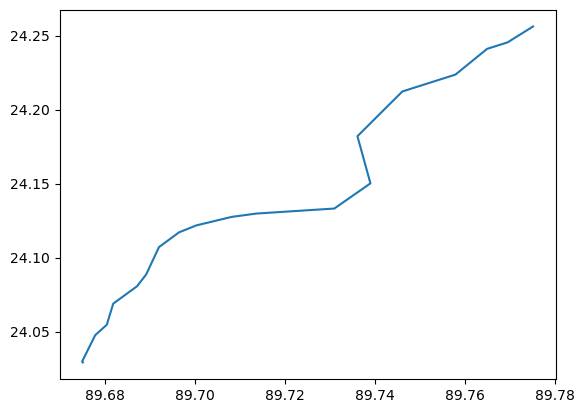

In [5]:
clbl.get_coordinates()
plt.plot(clbr.get_coordinates().x,clbr.get_coordinates().y)

In [6]:
# Load in (PODAAC) RiverSP files for set1, LF and HF
from tqdm import tqdm


filenames = glob.glob('/Volumes/OneTouch/work/SWOTC/brahmaputra/RiverSP/*.zip')
filenames

selfiles = [
 '/Volumes/OneTouch/work/SWOTC/brahmaputra/RiverSP/SWOT_L2_HR_RiverSP_Node_010_258_AS_20240203T045247_20240203T045258_PIC0_01.zip',
 '/Volumes/OneTouch/work/SWOTC/brahmaputra/RiverSP/SWOT_L2_HR_RiverSP_Node_010_273_AS_20240203T180043_20240203T180053_PIC0_01.zip',
 '/Volumes/OneTouch/work/SWOTC/brahmaputra/RiverSP/SWOT_L2_HR_RiverSP_Node_018_258_AS_20240719T025323_20240719T025334_PIC0_01.zip',
 '/Volumes/OneTouch/work/SWOTC/brahmaputra/RiverSP/SWOT_L2_HR_RiverSP_Node_018_273_AS_20240719T160119_20240719T160130_PIC0_03.zip']

# Read all files and trim to bbox (shapefile...)
bbox = gpd.read_file('/Volumes/OneTouch/work/SWOTbraided/tile_258_112L_boundary.shp')



coords = bbox.get_coordinates()
minlat = np.min(coords.y)
maxlat = np.max(coords.y)
minlon = np.min(coords.x)
maxlon = np.max(coords.x)

rivbox = (minlon, minlat, maxlon, maxlat)

gdflist = list()
for shp in tqdm(selfiles):
    temp = gpd.read_file(shp,bbox=rivbox)
    temp = temp.loc[temp['reach_id'].isin(reachIDs_b1.apply(str))]
    gdflist.append(temp)

print('Combining files into one geodataframe...')
#shp_files = [gpd.read_file(shp) for shp in filenames]
gdf_filt = pd.concat(gdflist)
print('Done!')

gdf_filt['dist'] = pc.projectToCenterline(clbr, gdf_filt, hemi)
gdf_filt


100%|██████████| 4/4 [00:06<00:00,  1.61s/it]
/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/3695482698.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_filt = pd.concat(gdflist)


Combining files into one geodataframe...
Done!


reach_id         node_id          time      time_tai  \
777   45253001525  45253001520015  7.602516e+08  7.602516e+08   
778   45253001525  45253001520025  7.602516e+08  7.602516e+08   
779   45253001525  45253001520035  7.602516e+08  7.602516e+08   
780   45253001525  45253001520045  7.602516e+08  7.602516e+08   
781   45253001525  45253001520055  7.602516e+08  7.602516e+08   
...           ...             ...           ...           ...   
1143  45253001965  45253001960555  7.746732e+08  7.746733e+08   
1144  45253001965  45253001960565  7.746732e+08  7.746733e+08   
1145  45253001965  45253001960575  7.746732e+08  7.746733e+08   
1146  45253001965  45253001960585  7.746732e+08  7.746733e+08   
1147  45253001965  45253001960595  7.746732e+08  7.746733e+08   

                  time_str        lat        lon         lat_u         lon_u  \
777   2024-02-03T04:59:49Z  24.133462  89.732471  8.629099e-05 -1.000000e+12   
778   2024-02-03T04:59:49Z  24.133294  89.739014  2.056160e-06  1.303640e-05   
779   2024-02-03T04:59:49Z  24.133883  89.741036  8.109700e-07  5.142080e-06   
780   2024-02-03T04:59:49Z  24.135252  89.742637  7.971100e-07  5.054520e-06   
781   2024-02-03T04:59:49Z  24.136589  89.744308  1.006750e-06  6.384390e-06   
...                    ...        ...        ...           ...           ...   
1143  2024-07-19T03:00:25Z  24.125774  89.735311  3.433390e-06 -1.000000e+12   
1144  2024-07-19T03:00:25Z  24.128167  89.736853  3.780310e-06 -1.000000e+12   
1145  2024-07-19T03:00:25Z  24.130537  89.737907  4.342160e-06 -1.000000e+12   
1146  2024-07-19T03:00:25Z  24.131883  89.737060  6.891020e-06 -1.000000e+12   
1147  2024-07-19T03:00:25Z  24.131993  89.731893  9.910700e-06 -1.000000e+12   

     river_name  ...  p_wse_var  p_width   p_wid_var  p_dist_out    p_length  \
777     no_data  ...        0.0   3982.0  235228.333    404158.0  202.264636   
778     no_data  ...        0.0   3781.5    9806.000    404360.0  201.890261   
779     no_data  ...        0.0   3457.0   10761.139    404554.0  193.866036   
780     no_data  ...        0.0   3436.0   18923.667    404753.0  199.215519   
781     no_data  ...        0.0   3432.5   35132.667    404950.0  196.540778   
...         ...  ...        ...      ...         ...         ...         ...   
1143    no_data  ...        0.0   2226.0  109936.472    391021.0  193.866044   
1144    no_data  ...        0.0   2341.0   51302.333    391215.0  193.866044   
1145    no_data  ...        0.0   2620.0   46870.472    391412.0  196.540786   
1146    no_data  ...        0.0   2611.0   19870.917    391611.0  199.215528   
1147    no_data  ...        0.0   3282.5  585134.204    391826.0  214.680497   

      p_dam_id  p_n_ch_max  p_n_ch_mod                   geometry  \
777          0          10           9  POINT (89.73170 24.13400)   
778          0           8           8  POINT (89.73251 24.13561)   
779          0           7           6  POINT (89.73337 24.13722)   
780          0           9           6  POINT (89.73419 24.13883)   
781          0          10           8  POINT (89.73500 24.14044)   
...        ...         ...         ...                        ...   
1143         0           5           4  POINT (89.73466 24.12556)   
1144         0           7           6  POINT (89.73399 24.12719)   
1145         0           5           4  POINT (89.73327 24.12883)   
1146         0           5           4  POINT (89.73254 24.13047)   
1147         0          12           4  POINT (89.73156 24.13225)   

              dist  
777   14264.505861  
778   14461.020953  
779   14659.433522  
780   14856.328108  
781   15052.463708  
...            ...  
1143  14145.749613  
1144  14145.749613  
1145  14145.749613  
1146  14145.749613  
1147  14145.749613  

[254 rows x 54 columns]

/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Found 254 nodes in the provided reaches.
223 nodes after filtering.


reach_id         node_id          time      time_tai  \
777   45253001525  45253001520015  7.602516e+08  7.602516e+08   
778   45253001525  45253001520025  7.602516e+08  7.602516e+08   
779   45253001525  45253001520035  7.602516e+08  7.602516e+08   
780   45253001525  45253001520045  7.602516e+08  7.602516e+08   
781   45253001525  45253001520055  7.602516e+08  7.602516e+08   
...           ...             ...           ...           ...   
1143  45253001965  45253001960555  7.746732e+08  7.746733e+08   
1144  45253001965  45253001960565  7.746732e+08  7.746733e+08   
1145  45253001965  45253001960575  7.746732e+08  7.746733e+08   
1146  45253001965  45253001960585  7.746732e+08  7.746733e+08   
1147  45253001965  45253001960595  7.746732e+08  7.746733e+08   

                  time_str        lat        lon         lat_u         lon_u  \
777   2024-02-03T04:59:49Z  24.133462  89.732471  8.629099e-05 -1.000000e+12   
778   2024-02-03T04:59:49Z  24.133294  89.739014  2.056160e-06  1.303640e-05   
779   2024-02-03T04:59:49Z  24.133883  89.741036  8.109700e-07  5.142080e-06   
780   2024-02-03T04:59:49Z  24.135252  89.742637  7.971100e-07  5.054520e-06   
781   2024-02-03T04:59:49Z  24.136589  89.744308  1.006750e-06  6.384390e-06   
...                    ...        ...        ...           ...           ...   
1143  2024-07-19T03:00:25Z  24.125774  89.735311  3.433390e-06 -1.000000e+12   
1144  2024-07-19T03:00:25Z  24.128167  89.736853  3.780310e-06 -1.000000e+12   
1145  2024-07-19T03:00:25Z  24.130537  89.737907  4.342160e-06 -1.000000e+12   
1146  2024-07-19T03:00:25Z  24.131883  89.737060  6.891020e-06 -1.000000e+12   
1147  2024-07-19T03:00:25Z  24.131993  89.731893  9.910700e-06 -1.000000e+12   

     river_name  ...   p_wid_var  p_dist_out    p_length  p_dam_id  \
777     no_data  ...  235228.333    404158.0  202.264636         0   
778     no_data  ...    9806.000    404360.0  201.890261         0   
779     no_data  ...   10761.139    404554.0  193.866036         0   
780     no_data  ...   18923.667    404753.0  199.215519         0   
781     no_data  ...   35132.667    404950.0  196.540778         0   
...         ...  ...         ...         ...         ...       ...   
1143    no_data  ...  109936.472    391021.0  193.866044         0   
1144    no_data  ...   51302.333    391215.0  193.866044         0   
1145    no_data  ...   46870.472    391412.0  196.540786         0   
1146    no_data  ...   19870.917    391611.0  199.215528         0   
1147    no_data  ...  585134.204    391826.0  214.680497         0   

      p_n_ch_max  p_n_ch_mod                   geometry          dist  \
777           10           9  POINT (89.73170 24.13400)  14264.505861   
778            8           8  POINT (89.73251 24.13561)  14461.020953   
779            7           6  POINT (89.73337 24.13722)  14659.433522   
780            9           6  POINT (89.73419 24.13883)  14856.328108   
781           10           8  POINT (89.73500 24.14044)  15052.463708   
...          ...         ...                        ...           ...   
1143           5           4  POINT (89.73466 24.12556)  14145.749613   
1144           7           6  POINT (89.73399 24.12719)  14145.749613   
1145           5           4  POINT (89.73327 24.12883)  14145.749613   
1146           5           4  POINT (89.73254 24.13047)  14145.749613   
1147          12           4  POINT (89.73156 24.13225)  14145.749613   

                      Datetime  month  
777  2024-02-03 04:59:49+00:00      2  
778  2024-02-03 04:59:49+00:00      2  
779  2024-02-03 04:59:49+00:00      2  
780  2024-02-03 04:59:49+00:00      2  
781  2024-02-03 04:59:49+00:00      2  
...                        ...    ...  
1143 2024-07-19 03:00:25+00:00      7  
1144 2024-07-19 03:00:25+00:00      7  
1145 2024-07-19 03:00:25+00:00      7  
1146 2024-07-19 03:00:25+00:00      7  
1147 2024-07-19 03:00:25+00:00      7  

[223 rows x 56 columns]

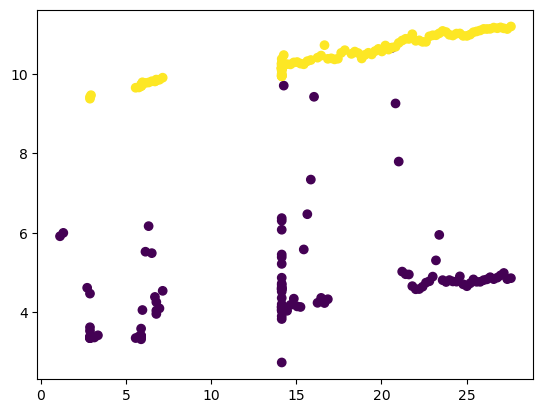

In [7]:
print('Found '+str(len(gdf_filt))+' nodes in the provided reaches.')

gdf_filt.mask((gdf_filt.wse == -999999999999.0),inplace=True)
#gdf_filt.mask((gdf_filt.node_q == 3),inplace=True) # Filter bad quality nodes
#gdf_filt.mask((gdf_filt.node_q == 2),inplace=True) # Filter bad quality nodes
gdf_filt = gdf_filt.dropna() 
print(''+str(len(gdf_filt))+' nodes after filtering.')
gdf_filt['Datetime'] = pd.to_datetime(gdf_filt['time_str'])
gdf_filt['month'] = gdf_filt['Datetime'].dt.month
plt.scatter(gdf_filt.dist/1000,gdf_filt.wse,c=gdf_filt.month)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
gdf_filt


In [8]:
# branch 2
gdflist = list()
for shp in tqdm(selfiles):
    temp = gpd.read_file(shp,bbox=rivbox)
    temp = temp.loc[temp['reach_id'].isin(reachIDs_b2.apply(str))]
    gdflist.append(temp)

print('Combining files into one geodataframe...')
#shp_files = [gpd.read_file(shp) for shp in filenames]
gdf_filt_b2 = pd.concat(gdflist)
print('Done!')

gdf_filt_b2['dist'] = pc.projectToCenterline(clbl, gdf_filt_b2, hemi)
gdf_filt_b2

100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

Combining files into one geodataframe...
Done!



/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/3677889436.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_filt_b2 = pd.concat(gdflist)


reach_id         node_id          time      time_tai  \
704  45253001505  45253001500015  7.602516e+08  7.602516e+08   
705  45253001505  45253001500025  7.602516e+08  7.602516e+08   
706  45253001505  45253001500035  7.602516e+08  7.602516e+08   
707  45253001505  45253001500045  7.602516e+08  7.602516e+08   
708  45253001505  45253001500055  7.602516e+08  7.602516e+08   
..           ...             ...           ...           ...   
772  45253001515  45253001510575  7.746732e+08  7.746733e+08   
773  45253001515  45253001510585  7.746732e+08  7.746733e+08   
774  45253001515  45253001510595  7.746732e+08  7.746733e+08   
775  45253001515  45253001510605  7.746732e+08  7.746733e+08   
776  45253001515  45253001510615  7.746732e+08  7.746733e+08   

                 time_str        lat        lon         lat_u         lon_u  \
704  2024-02-03T04:59:58Z  24.045326  89.680016  2.057090e-06  1.300557e-05   
705  2024-02-03T04:59:58Z  24.044281  89.681411  2.445890e-06  1.546358e-05   
706  2024-02-03T04:59:58Z  24.039369  89.707571  1.112620e-06  7.040770e-06   
707  2024-02-03T04:59:58Z  24.036895  89.706905  6.848000e-07  4.333260e-06   
708  2024-02-03T04:59:58Z  24.039689  89.673063  1.600550e-06  1.011658e-05   
..                    ...        ...        ...           ...           ...   
772  2024-07-19T03:00:25Z  24.126425  89.723232  5.750320e-06 -1.000000e+12   
773  2024-07-19T03:00:25Z  24.127301  89.724912  5.527930e-06 -1.000000e+12   
774  2024-07-19T03:00:25Z  24.128422  89.726703  7.023440e-06 -1.000000e+12   
775  2024-07-19T03:00:25Z  24.129383  89.727935  1.148692e-05 -1.000000e+12   
776  2024-07-19T03:00:25Z  24.131155  89.729790  4.570971e-05 -1.000000e+12   

    river_name  ...  p_wse_var  p_width    p_wid_var  p_dist_out    p_length  \
704    no_data  ...    0.00000   2266.5    16056.472    306315.0  186.404374   
705    no_data  ...    0.00000   2027.0     9010.000    306527.0  211.782364   
706    no_data  ...    0.00000   1942.0     5240.816    306738.0  210.594121   
707    no_data  ...    0.00000   2815.0   252352.472    306921.0  182.970606   
708    no_data  ...    0.00000   3152.0    20436.980    307133.0  212.376485   
..         ...  ...        ...      ...          ...         ...         ...   
772    no_data  ...    0.00000   8294.0   476839.102    403161.0  214.159636   
773    no_data  ...    0.00000   9777.0   880077.556    403345.0  183.565403   
774    no_data  ...    0.00000   9327.0  2030370.531    403559.0  214.159638   
775    no_data  ...    0.00000   8515.5   460415.333    403742.0  183.565405   
776    no_data  ...    0.00125   7249.5  1932887.734    403956.0  213.565526   

     p_dam_id  p_n_ch_max  p_n_ch_mod                   geometry          dist  
704         0           2           2  POINT (89.67740 24.04642)   1938.714885  
705         0           4           2  POINT (89.67697 24.04467)   1740.195719  
706         0           4           4  POINT (89.67688 24.04278)   1531.297521  
707         0           5           3  POINT (89.67665 24.04102)   1335.349396  
708         0           5           5  POINT (89.67631 24.03927)   1137.921534  
..        ...         ...         ...                        ...           ...  
772         0          19          11  POINT (89.72210 24.13166)  13225.021131  
773         0          14           7  POINT (89.72403 24.13197)  13423.778287  
774         0          15          15  POINT (89.72595 24.13229)  13622.535447  
775         0          16          10  POINT (89.72788 24.13261)  13821.292604  
776         0          12          12  POINT (89.72995 24.13294)  14035.167829  

[146 rows x 54 columns]

Found 146 nodes in the provided reaches.
133 nodes after filtering.


/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


reach_id         node_id          time      time_tai  \
704  45253001505  45253001500015  7.602516e+08  7.602516e+08   
705  45253001505  45253001500025  7.602516e+08  7.602516e+08   
706  45253001505  45253001500035  7.602516e+08  7.602516e+08   
707  45253001505  45253001500045  7.602516e+08  7.602516e+08   
708  45253001505  45253001500055  7.602516e+08  7.602516e+08   
..           ...             ...           ...           ...   
772  45253001515  45253001510575  7.746732e+08  7.746733e+08   
773  45253001515  45253001510585  7.746732e+08  7.746733e+08   
774  45253001515  45253001510595  7.746732e+08  7.746733e+08   
775  45253001515  45253001510605  7.746732e+08  7.746733e+08   
776  45253001515  45253001510615  7.746732e+08  7.746733e+08   

                 time_str        lat        lon         lat_u         lon_u  \
704  2024-02-03T04:59:58Z  24.045326  89.680016  2.057090e-06  1.300557e-05   
705  2024-02-03T04:59:58Z  24.044281  89.681411  2.445890e-06  1.546358e-05   
706  2024-02-03T04:59:58Z  24.039369  89.707571  1.112620e-06  7.040770e-06   
707  2024-02-03T04:59:58Z  24.036895  89.706905  6.848000e-07  4.333260e-06   
708  2024-02-03T04:59:58Z  24.039689  89.673063  1.600550e-06  1.011658e-05   
..                    ...        ...        ...           ...           ...   
772  2024-07-19T03:00:25Z  24.126425  89.723232  5.750320e-06 -1.000000e+12   
773  2024-07-19T03:00:25Z  24.127301  89.724912  5.527930e-06 -1.000000e+12   
774  2024-07-19T03:00:25Z  24.128422  89.726703  7.023440e-06 -1.000000e+12   
775  2024-07-19T03:00:25Z  24.129383  89.727935  1.148692e-05 -1.000000e+12   
776  2024-07-19T03:00:25Z  24.131155  89.729790  4.570971e-05 -1.000000e+12   

    river_name  ...    p_wid_var  p_dist_out    p_length  p_dam_id  \
704    no_data  ...    16056.472    306315.0  186.404374         0   
705    no_data  ...     9010.000    306527.0  211.782364         0   
706    no_data  ...     5240.816    306738.0  210.594121         0   
707    no_data  ...   252352.472    306921.0  182.970606         0   
708    no_data  ...    20436.980    307133.0  212.376485         0   
..         ...  ...          ...         ...         ...       ...   
772    no_data  ...   476839.102    403161.0  214.159636         0   
773    no_data  ...   880077.556    403345.0  183.565403         0   
774    no_data  ...  2030370.531    403559.0  214.159638         0   
775    no_data  ...   460415.333    403742.0  183.565405         0   
776    no_data  ...  1932887.734    403956.0  213.565526         0   

     p_n_ch_max  p_n_ch_mod                   geometry          dist  \
704           2           2  POINT (89.67740 24.04642)   1938.714885   
705           4           2  POINT (89.67697 24.04467)   1740.195719   
706           4           4  POINT (89.67688 24.04278)   1531.297521   
707           5           3  POINT (89.67665 24.04102)   1335.349396   
708           5           5  POINT (89.67631 24.03927)   1137.921534   
..          ...         ...                        ...           ...   
772          19          11  POINT (89.72210 24.13166)  13225.021131   
773          14           7  POINT (89.72403 24.13197)  13423.778287   
774          15          15  POINT (89.72595 24.13229)  13622.535447   
775          16          10  POINT (89.72788 24.13261)  13821.292604   
776          12          12  POINT (89.72995 24.13294)  14035.167829   

                     Datetime  month  
704 2024-02-03 04:59:58+00:00      2  
705 2024-02-03 04:59:58+00:00      2  
706 2024-02-03 04:59:58+00:00      2  
707 2024-02-03 04:59:58+00:00      2  
708 2024-02-03 04:59:58+00:00      2  
..                        ...    ...  
772 2024-07-19 03:00:25+00:00      7  
773 2024-07-19 03:00:25+00:00      7  
774 2024-07-19 03:00:25+00:00      7  
775 2024-07-19 03:00:25+00:00      7  
776 2024-07-19 03:00:25+00:00      7  

[133 rows x 56 columns]

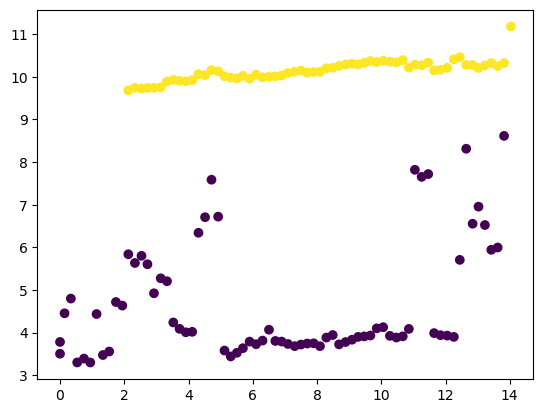

In [9]:
print('Found '+str(len(gdf_filt_b2))+' nodes in the provided reaches.')

gdf_filt_b2.mask((gdf_filt_b2.wse == -999999999999.0),inplace=True)
#gdf_filt.mask((gdf_filt.node_q == 3),inplace=True) # Filter bad quality nodes
#gdf_filt.mask((gdf_filt.node_q == 2),inplace=True) # Filter bad quality nodes
gdf_filt_b2 = gdf_filt_b2.dropna() 
print(''+str(len(gdf_filt_b2))+' nodes after filtering.')
gdf_filt_b2['Datetime'] = pd.to_datetime(gdf_filt_b2['time_str'])
gdf_filt_b2['month'] = gdf_filt_b2['Datetime'].dt.month
plt.scatter(gdf_filt_b2.dist/1000,gdf_filt_b2.wse,c=gdf_filt_b2.month)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
gdf_filt_b2

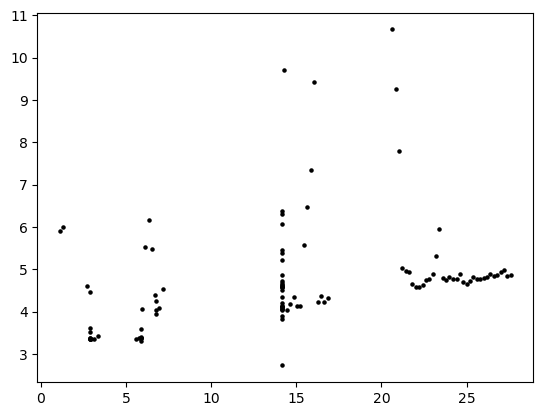

In [10]:
pixcdate = '20240203'
month = int(pixcdate[4:6])
month

sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]

plt.scatter(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,s=5,c='black',label='RiverSP-b1')



In [11]:
riverSP_files = glob.glob(odir+'riverSP_out/'+tileID+'/*_riverSP.geojson')
riverSP_files

selFiles = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson',
 '/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson']


Runnning braided river analysis for: 20240203
Closest mask date: 0224


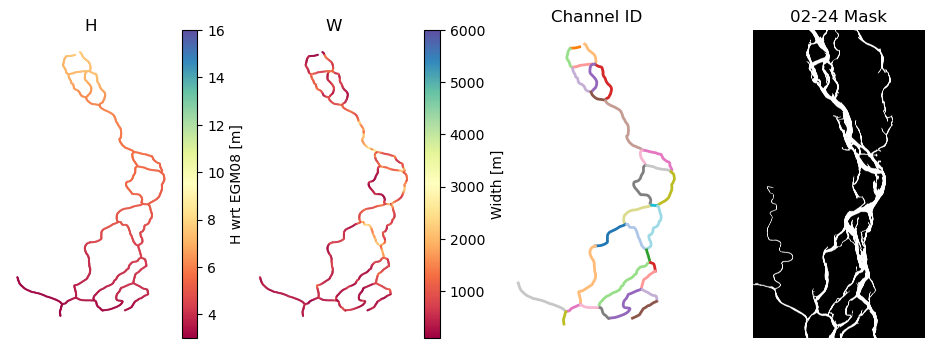

Runnning braided river analysis for: 20240719
Closest mask date: 0924


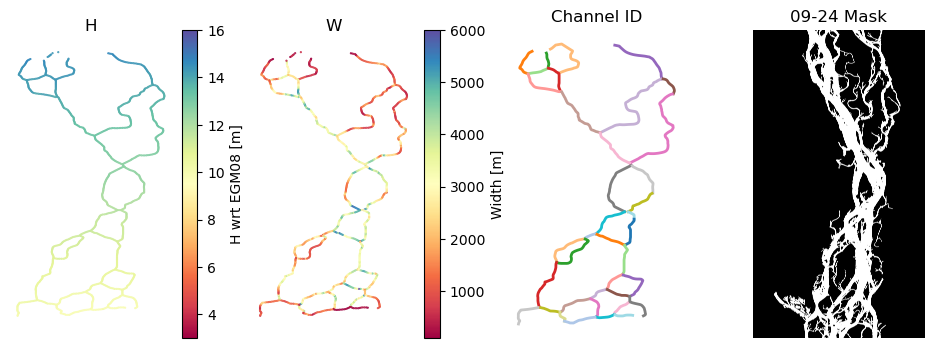

In [12]:
# ------------------------------ PLOT ALL RiverSP dates ------------------------------

for filename in selFiles:

    pixcdate = os.path.basename(filename)[0:8]

    print('Runnning braided river analysis for:',str(pixcdate))
    maskdate, water_mask_tiff = pc.getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)

    # Load RiverSP product, water mask, and plot
    riversp_test = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    riversp_test = riversp_test.to_crs('EPSG:4326')
    #riversp_test = riversp_test.to_crs('EPSG:3857')  # Example of a projected UTM CRS



    # LOAD IN MASK (dilate, take largest piece)
    water_mask_tiff = glob.glob("/Volumes/OneTouch/work/water_masks/brahmaputra/"+tileID+"/S2*"+str(maskdate)+".tif")[0]
    water_mask = skel.get_watermask(water_mask_tiff)
    dilated_mask = binary_dilation(water_mask, footprint=skel.createKernel(5)) # OG 10
    labeled_mask, num_features = label(dilated_mask, return_num=True)
    component_sizes = np.bincount(labeled_mask.ravel())
    component_sizes[0] = 0
    largest_component_mask = (labeled_mask == component_sizes.argmax())


    # display results and save to figure (vmin and vmax set based on 02-03-2024 and 07-19-2024)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
    ax = axes.ravel()

    # plot watermask at end
    ax[3].imshow(largest_component_mask,cmap=plt.cm.gray)
    ax[3].set_title(maskdate[0:2]+'-'+maskdate[2:4]+' Mask')
    ax[3].axis('off')


    riversp_test.plot(ax=ax[0],column='heightEGM_med',s=0.3,legend=True,legend_kwds={'label': 'H wrt EGM08 [m]'},vmin=3, vmax=16,cmap='Spectral')
    ax[0].set_title('H')
    ax[0].axis('off')
    # set aspect based on mask image
    asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
    asp /= np.abs(np.diff(ax[3].get_xlim())[0] / np.diff(ax[3].get_ylim())[0])
    ax[0].set_aspect(asp)



    riversp_test.plot(ax=ax[1],column='width',s=0.3,legend=True,legend_kwds={'label': 'Width [m]'},vmin=100, vmax=6000,cmap='Spectral')
    ax[1].set_title('W')
    ax[1].axis('off')
    # set aspect based on mask image
    asp = np.diff(ax[1].get_xlim())[0] / np.diff(ax[1].get_ylim())[0]
    asp /= np.abs(np.diff(ax[3].get_xlim())[0] / np.diff(ax[3].get_ylim())[0])
    ax[1].set_aspect(asp)


    colors = plt.cm.tab20(np.linspace(0, 1, 20))  # tab20 has 20 colors
    color_map = {branch_id: colors[i % 20] for i, branch_id in enumerate(np.arange(1,45))}

    #riversp_test.plot(column='channelID',cmap=color_map,s=0.1,legend=True,legend_kwds={'label': 'ChannelID'})

    for channelID in np.unique(riversp_test.channelID):
        sub = riversp_test.loc[riversp_test.channelID == channelID]
        color = color_map[channelID]
        ax[2].plot(sub.get_coordinates().x,sub.get_coordinates().y,color=color,linewidth=2,label=f"Branch {channelID}")

    # for _, row in riversp_test.iterrows():
    #     color = color_map[row['channelID']]
    #     ax[2].plot(*row.geometry.xy, color=color, linewidth=2, label=f"Branch {row['channelID']}")

    #riversp_test.plot(ax=ax[2],column='channelID',s=0.1,legend=True,legend_kwds={'label': 'ChannelID'},vmin=0, vmax=42)
    ax[2].set_title('Channel ID')
    ax[2].axis('off')
    # set aspect based on mask image
    asp = np.diff(ax[2].get_xlim())[0] / np.diff(ax[2].get_ylim())[0]
    asp /= np.abs(np.diff(ax[3].get_xlim())[0] / np.diff(ax[3].get_ylim())[0])
    ax[2].set_aspect(asp)


    #fig.suptitle('RiverSP '+str(pixcdate))

    isExist = os.path.exists(figdir+'/'+tileID+'/riverSP_v1/')
    if not isExist:
        os.makedirs(figdir+'/'+tileID+'/riverSP_v1/')
    plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_gen_riverSP.png')
    plt.show()


Runnning braided river analysis for: 20240203
Closest mask date: 0224


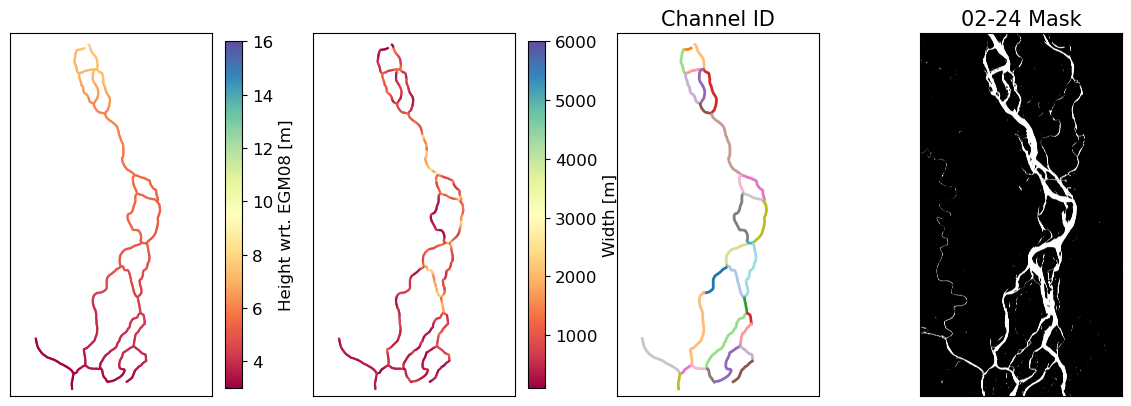

Runnning braided river analysis for: 20240719
Closest mask date: 0924


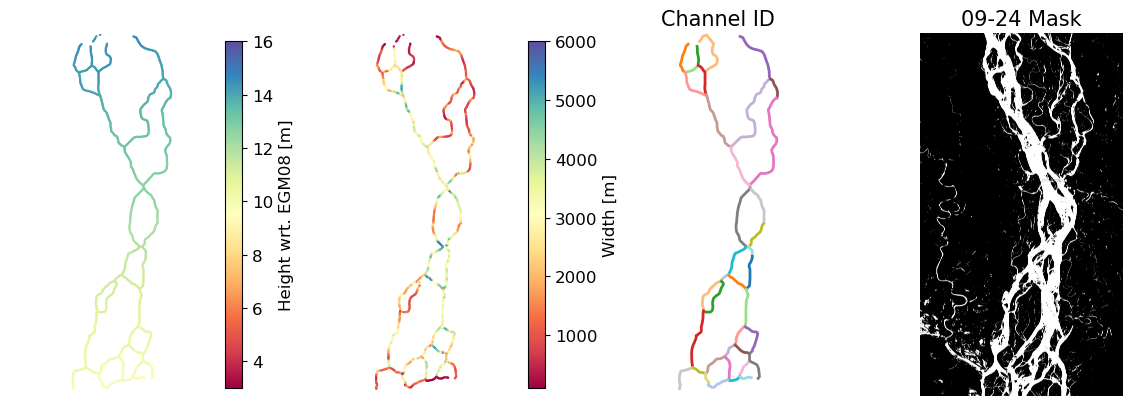

In [13]:
### With improved scale

import matplotlib.cm as cm
import matplotlib.colors as mcolors
for filename in selFiles:

    pixcdate = os.path.basename(filename)[0:8]

    print('Runnning braided river analysis for:',str(pixcdate))
    maskdate, water_mask_tiff = pc.getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)

    # Load RiverSP product, water mask, and plot
    riversp_test = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    riversp_test = riversp_test.to_crs('EPSG:4326')
    #riversp_test = riversp_test.to_crs('EPSG:3857')  # Example of a projected UTM CRS



    # LOAD IN MASK (dilate, take largest piece)
    water_mask_tiff = glob.glob("/Volumes/OneTouch/work/water_masks/brahmaputra/"+tileID+"/S2*"+str(maskdate)+".tif")[0]
    water_mask = skel.get_watermask(water_mask_tiff)
    dilated_mask = binary_dilation(water_mask, footprint=skel.createKernel(5)) # OG 10
    labeled_mask, num_features = label(dilated_mask, return_num=True)
    component_sizes = np.bincount(labeled_mask.ravel())
    component_sizes[0] = 0
    largest_component_mask = (labeled_mask == component_sizes.argmax())



    heights = riversp_test.heightEGM_med.to_numpy()
    heights

    widths = riversp_test.width.to_numpy()
    cID = riversp_test.channelID.to_numpy()
    wm_copy = np.zeros_like(water_mask)


    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
    ax = axes.ravel()

    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False

    ax[0].imshow(wm_copy, cmap=plt.cm.gray_r)
    coords_df = riversp_test.get_coordinates()
    cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
    ax[0].scatter(cl_pixel_coords.x,cl_pixel_coords.y,c=heights,s=0.5, vmin=3, vmax=16,cmap='Spectral')
    # Create a colorbar
    cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[0], shrink=0.75)
    cbar.set_label("Height wrt. EGM08 [m]",fontsize=12)
    cbar.ax.tick_params(labelsize=12)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    #ax[0].set_title('H')


    ax[1].imshow(wm_copy, cmap=plt.cm.gray_r)
    coords_df = riversp_test.get_coordinates()
    cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
    ax[1].scatter(cl_pixel_coords.x,cl_pixel_coords.y,c=widths,s=0.5, vmin=100, vmax=6000,cmap='Spectral')
    # Create a colorbar
    cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=100, vmax=6000), cmap='Spectral'), ax=ax[1], shrink=0.75)
    cbar.set_label("Width [m]",fontsize=12)
    cbar.ax.tick_params(labelsize=12)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    #ax[1].set_title('W')

    colors = plt.cm.tab20(np.linspace(0, 1, 20))  # tab20 has 20 colors
    color_map = {branch_id: colors[i % 20] for i, branch_id in enumerate(np.arange(1,45))}

    ax[2].imshow(wm_copy, cmap=plt.cm.gray_r)
    coords_df = riversp_test.get_coordinates()
    cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)

    for channelID in np.unique(riversp_test.channelID):
        sub = riversp_test.loc[riversp_test.channelID == channelID]
        color = color_map[channelID]
        coords_df = sub.get_coordinates()
        cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax[2].plot(cl_pixel_coords.x,cl_pixel_coords.y,color=color,linewidth=2)

    # Create a colorbar
    cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[2], shrink=0.75, alpha=0)
    #cbar.set_label("Height")
    cbar.ax.set_visible(False)  # Hides the entire colorbar, but keeps space

    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title('Channel ID',fontsize=15)


    ax[3].imshow(water_mask, cmap=plt.cm.gray)
    ax[3].set_xticks([])
    ax[3].set_yticks([])
    ax[3].set_title(maskdate[0:2]+'-'+maskdate[2:4]+' Mask',fontsize=15)
    cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[3], shrink=0.75, alpha=0)
    cbar.ax.set_visible(False)  # Hides the entire colorbar, but keeps space


    #fig.suptitle('RiverSP '+str(pixcdate))

    isExist = os.path.exists(figdir+'/'+tileID+'/riverSP_v1/')
    if not isExist:
        os.makedirs(figdir+'/'+tileID+'/riverSP_v1/')
    plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_gen_riverSP.png')
    plt.show()

      heightEGM_med        width  channelID nodeID                   geometry
0         14.166401  1260.809292          3     30  POINT (89.66637 24.58720)
1         14.102318  1870.519379          3     31  POINT (89.66492 24.58829)
2         14.144417  1208.836827          3     32  POINT (89.66342 24.58927)
3         14.156052   985.930028          3     33  POINT (89.66206 24.59043)
4         14.148098  1103.951450          3     34  POINT (89.66116 24.59192)
...             ...          ...        ...    ...                        ...
1282       9.856495  1171.998514         42   4217  POINT (89.73200 24.05459)
1283       9.893663  1141.640240         42   4218  POINT (89.73366 24.05522)
1284       9.842451  1197.019123         42   4219  POINT (89.73541 24.05567)
1285       9.901463  1248.975619         42   4220  POINT (89.73716 24.05612)
1286       9.846645  1528.637806         42   4221  POINT (89.73890 24.05660)

[1287 rows x 5 columns]


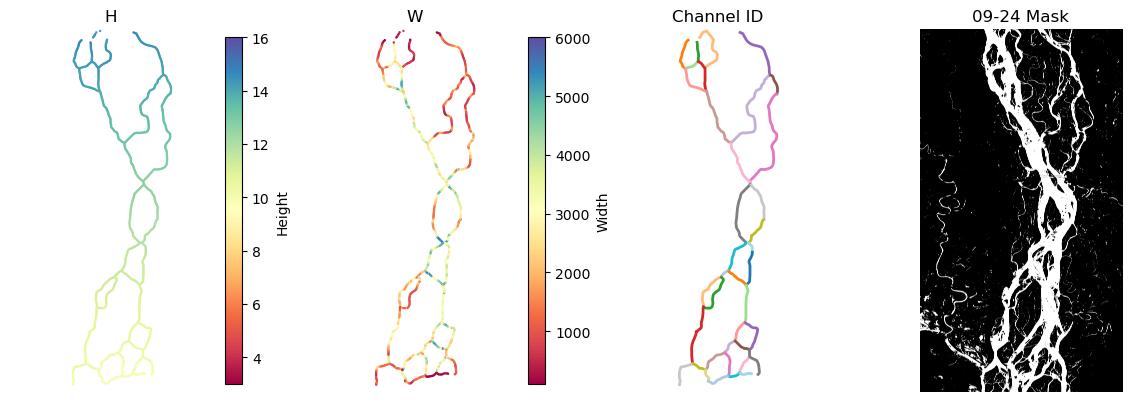

In [14]:
# water_mask = skel.get_watermask(water_mask_tiff)
# fig, ax = plt.subplots(figsize=(3, 6))

# # water mask
# ax.imshow(water_mask, cmap=plt.cm.gray)
# # entire skeleton
# coords_df = cl_gen.get_coordinates()
# cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
# ax.scatter(cl_pixel_coords.x,cl_pixel_coords.y,color='red',s=0.2)

# test
import matplotlib.cm as cm
import matplotlib.colors as mcolors

heights = riversp_test.heightEGM_med.to_numpy()
heights

widths = riversp_test.width.to_numpy()
cID = riversp_test.channelID.to_numpy()
wm_copy = np.zeros_like(water_mask)


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(wm_copy, cmap=plt.cm.gray_r)
coords_df = riversp_test.get_coordinates()
cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
ax[0].scatter(cl_pixel_coords.x,cl_pixel_coords.y,c=heights,s=0.5, vmin=3, vmax=16,cmap='Spectral')
# Create a colorbar
cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[0], shrink=0.75)
cbar.set_label("Height")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('H')
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

ax[1].imshow(wm_copy, cmap=plt.cm.gray_r)
coords_df = riversp_test.get_coordinates()
cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
ax[1].scatter(cl_pixel_coords.x,cl_pixel_coords.y,c=widths,s=0.5, vmin=100, vmax=6000,cmap='Spectral')
# Create a colorbar
cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=100, vmax=6000), cmap='Spectral'), ax=ax[1], shrink=0.75)
cbar.set_label("Width")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('W')

colors = plt.cm.tab20(np.linspace(0, 1, 20))  # tab20 has 20 colors
color_map = {branch_id: colors[i % 20] for i, branch_id in enumerate(np.arange(1,45))}

ax[2].imshow(wm_copy, cmap=plt.cm.gray_r)
coords_df = riversp_test.get_coordinates()
cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)

for channelID in np.unique(riversp_test.channelID):
    sub = riversp_test.loc[riversp_test.channelID == channelID]
    color = color_map[channelID]
    coords_df = sub.get_coordinates()
    cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
    ax[2].plot(cl_pixel_coords.x,cl_pixel_coords.y,color=color,linewidth=2)

# Create a colorbar
cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[2], shrink=0.75, alpha=0)
#cbar.set_label("Height")
cbar.ax.set_visible(False)  # Hides the entire colorbar, but keeps space

ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Channel ID')


ax[3].imshow(water_mask, cmap=plt.cm.gray)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_title('09-24 Mask')
cbar = fig.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=3, vmax=16), cmap='Spectral'), ax=ax[3], shrink=0.75, alpha=0)
cbar.ax.set_visible(False)  # Hides the entire colorbar, but keeps space

#ax.scatter(cl_pixel_coords.x,cl_pixel_coords.y,c=cID,s=0.5, cmap=color_map)
print(riversp_test)

In [15]:
# Set x and y limits on lat/lon plots based on the respective coordinates from the pixel image
import rasterio
def pixel_coordinates2latlon(geotiff_path, pixel_y, pixel_x):
    # - Function to convert image coordinates to latitude and longitude

    pixel_coords = np.column_stack((pixel_y, pixel_x))

    with rasterio.open(geotiff_path) as dataset:
        latlon_coords = np.array([dataset.xy(row, col) for row, col in pixel_coords])

    df = pd.DataFrame({
        'latitude': latlon_coords[:, 1],  # latitude is the second item in (x, y) output from dataset.xy
        'longitude': latlon_coords[:, 0], # longitude is the first item in (x, y)
    })

    points = [tuple(x) for x in df[['longitude', 'latitude']].to_numpy()]

    return points

# ax[3].get_xlim()

# ax[3].get_ylim()

Closest mask date: 0224


(89.64711746840315, 89.83358716177746, 24.01122249748804, 24.682666760732328)

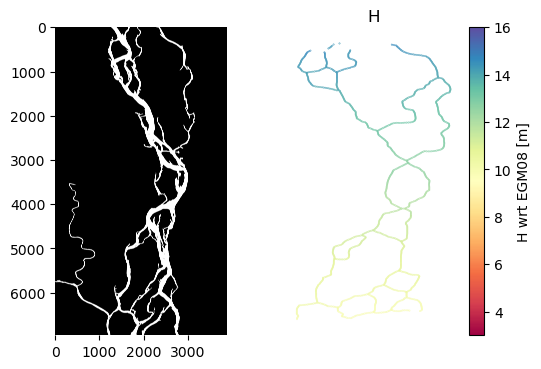

In [16]:
maskdate, water_mask_tiff = pc.getNearestMaskDate('20240203', tileID, LFmonths, HFmonths)
water_mask_tiff = glob.glob("/Volumes/OneTouch/work/water_masks/brahmaputra/"+tileID+"/S2*"+str(maskdate)+".tif")[0]
water_mask = skel.get_watermask(water_mask_tiff)
dilated_mask = binary_dilation(water_mask, footprint=skel.createKernel(5)) # OG 10
labeled_mask, num_features = label(dilated_mask, return_num=True)
component_sizes = np.bincount(labeled_mask.ravel())
component_sizes[0] = 0
largest_component_mask = (labeled_mask == component_sizes.argmax())

# Get aspect of water mask
fig, (ax, ax2) = plt.subplots(figsize=(6, 4),ncols=2)

ax.imshow(largest_component_mask,cmap=plt.cm.gray)
riversp_test.plot(ax=ax2,column='heightEGM_med',s=0.1,legend=True,legend_kwds={'label': 'H wrt EGM08 [m]'},vmin=3, vmax=16,cmap='Spectral')


asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0] # get aspect of new plot
asp /= np.abs(np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]) #resize to image
ax2.set_aspect(asp)
ax2.set_title('H')
ax2.axis('off')


# # display results and save to figure (vmin and vmax set based on 02-03-2024 and 07-19-2024)
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
# ax = axes.ravel()


# riversp_test.plot(ax=ax[0],column='heightEGM_med',s=0.1,legend=True,legend_kwds={'label': 'H wrt EGM08 [m]'},vmin=3, vmax=16,cmap='Spectral')
# ax[0].set_title('H')
# ax[0].axis('off')
# ax[0].set_aspect(asp)

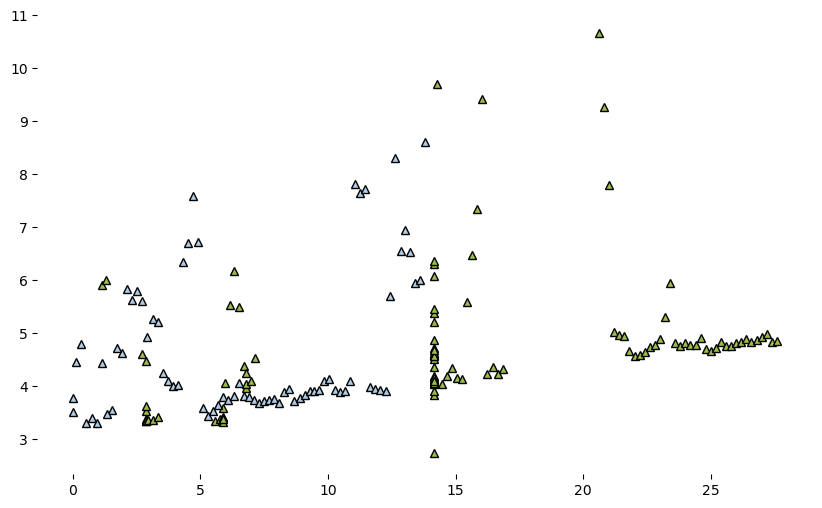

In [17]:
pixcdate = '20240203'
#ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
#ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

fig, ax = plt.subplots(figsize=(10, 6))
sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]
ax.plot(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#9BBC49',label='RiverSP-C1')

sub_rsp_b2 = gdf_filt_b2[gdf_filt_b2.month == int(pixcdate[4:6])]
ax.plot(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#AECCE4',label='RiverSP-C2')


Runnning braided river analysis for: 20240203
Closest mask date: 0224
maskdate: 0224
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/1249956922.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[22709.91372736 22909.91372736 23109.91372736 23309.91372736
 23509.91372736 23709.91372736 23909.91372736 24109.91372736
 24309.91372736 24509.91372736 24709.91372736 24909.91372736
 25109.91372736 25309.91372736 25509.91372736 25709.91372736
 25909.91372736 26109.91372736 26309.91372736 26509.91372736
 26709.91372736 26909.91372736 27109.91372736 27309.91372736
 27509.91372736 27709.91372736 27909.91372736 28109.91372736
 28309.91372736 28509.91372736 28709.91372736 28909.91372736
 29109.91372736 29309.91372736 29509.91372736 29709.91372736
 29909.91372736 30109.91372736 19523.0057808  19723.0057808
 19923.0057808  20123.0057808  20323.0057808  20523.0057808
 20723.0057808  20923.0057808  21123.0057808  21323.0057808
 21523.0057808  21723.0057808  21923.0057808  22123.005780

Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/1249956922.py:318: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in lgd.legendHandles:


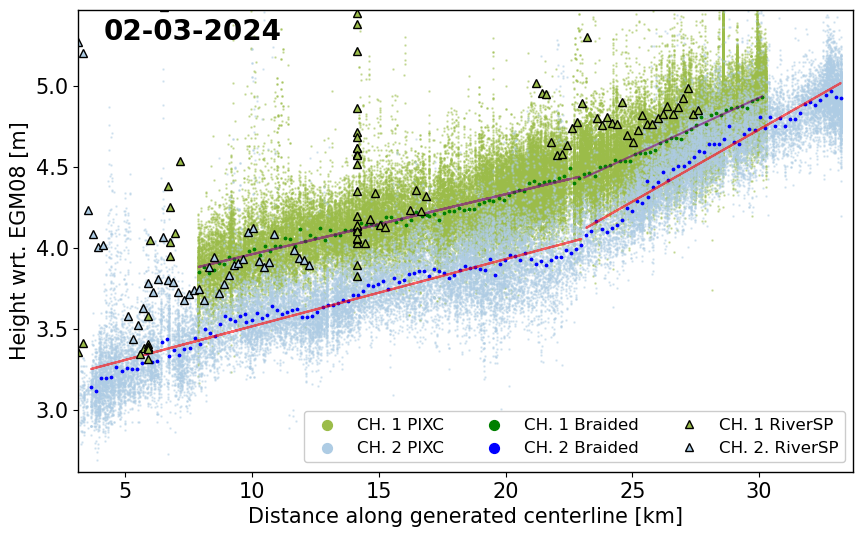

Runnning braided river analysis for: 20240719
Closest mask date: 0924
maskdate: 0924
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/1249956922.py:152: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4375.22840802  4175.22840802  3975.22840802  3775.22840802
  3575.22840802  3375.22840802  3175.22840802  2975.22840802
  2775.22840802  2575.22840803  2375.22840802  2175.22840802
  1975.22840802  1775.22840803  1575.22840803  1375.22840802
  1175.22840802   975.22840802   775.22840802   575.22840803
   375.22840802   175.22840802 11850.89997558 11650.89997558
 11450.89997558 11250.89997558 11050.89997558 10850.89997558
 10650.89997558 10450.89997558 10250.89997558 10050.89997558
  9850.89997558  9650.89997558  9450.89997558  9250.89997558
  9050.89997558  8850.89997558  8650.89997558  8450.89997558
  8250.89997558  8050.89997558  7850.89997558  7650.89997558
  7450.89997558  7250.89997558  7050.89997558  6850.89997558
  6650.89997558  6450.89997558  6250.89997558  6050.899

Slope negative! Flipping centerline and re-projecting...
Projected!
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_23938/1249956922.py:318: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in lgd.legendHandles:


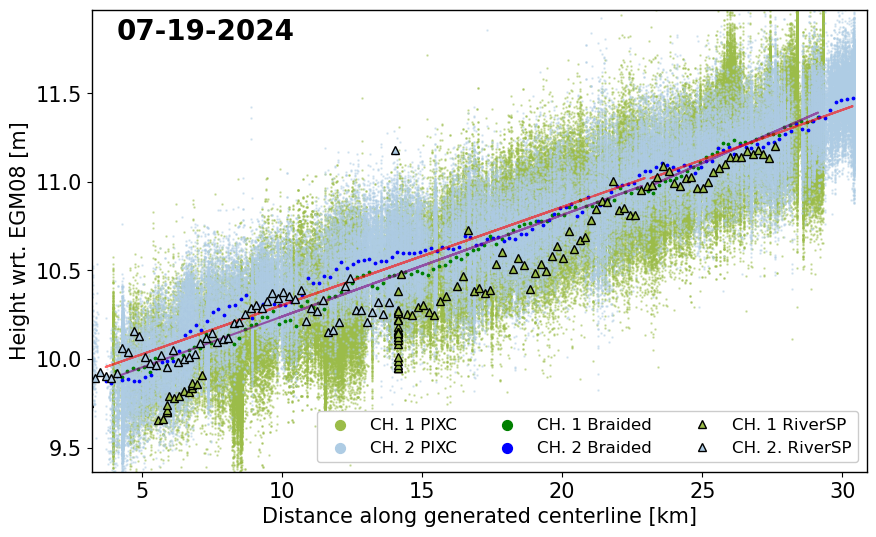

In [19]:
# PLOT just the one needed for the paper.....

# ------------------------------ PLOT selected channels for HF and LF ------------------------------



from sklearn.linear_model import LinearRegression

# LARGE CHANNELS (entire)
# channel1_dict = dict({'0224':['1','4','8','10','11','12','14','16','17','19','18','22','25','27','28','30','32'],
#                       '0924':[]})
# channel2_dict = dict({'0224':[],
#                       '0924':[]})

allSets = ['set2','set3','set4']
allSets = ['set1','set2','set3']
allSets = ['set1']


for channelSet in allSets:

#channelSet = 'set2'

    if channelSet == 'set1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25','27','28','30','32'],
                              '0324': ['20','23','25','26','28','30'],
                            '0924':['23','26','28','31','35','41'],
                            '1024':['24','27','31','34','38']})
        channel2_dict = dict({'0224':['21','23','24','34','35','38'],
                              '0324':['21','22','32','33','36'],
                            '0924':['22','24','27','37','38','43'],
                            '1024':['23','25','29','36','41','43']})


    if channelSet == 'set1p1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25'],
                            '0924':['23','26'],
                            '1024':['24','27']})
        channel2_dict = dict({'0224':['21'],
                            '0924':['22','24'],
                            '1024':['23','25']})

    if channelSet == 'set2':
        # SMALLER CHANNELS (divide that merges in HF)
        channel1_dict = dict({'0224':['14','16'],
                              '0324': ['12','15'],
                            '0924':['14','16'],
                            '1024':['16','18']})
        channel2_dict = dict({'0224':['13'],
                              '0324':['13'],
                            '0924':['14','16'],
                            '1024':['16','18']})

    if channelSet == 'set3':
        # Meander and the straight (No1)
        channel1_dict = dict({'0224':['16','17'],
                              '0324':['15','16'],
                            '0924':['16','17'],
                            '1024': ['18','19']})
        channel2_dict = dict({'0224':['15'],
                              '0324':['14'],
                            '0924':['15'],
                            '1024': ['17']})

    if channelSet == 'set4':
        # Meander and the straight (No2)
        channel1_dict = dict({'0224':['18','22'],
                              '0324':['17','20'],
                            '0924':['19','23'],
                            '1024':['21','24']})
        channel2_dict = dict({'0224':['20'],
                              '0324':['19'],
                            '0924':['20','21'],
                            '1024':['20','22']})

    sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson','/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson']

    #sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson']


    for filename in sel_riverSP:

        pixcdate = os.path.basename(filename)[0:8]

        print('Runnning braided river analysis for:',str(pixcdate))
        maskdate, water_mask_tiff = pc.getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)
        print('maskdate:',maskdate)


        # Load RiverSP product
        riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        print('reading in file:',odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        riversp_gdf = riversp_gdf.to_crs('EPSG:4326')

        # load generated CLs
        cl_gen = gpd.read_file(odir+tileID+'/'+maskdate+'_generated_cl.geojson')
        cl_gen = cl_gen.to_crs('EPSG:4326') 
        sword_cl_gdf = sword_cl_gdf.to_crs('EPSG:4326')

        # Selected channels
        ch1 = channel1_dict[maskdate]
        ch2 = channel2_dict[maskdate]

        ch1 = list(map(int, ch1))
        ch2 = list(map(int, ch2))
        branch_colors = ['green','blue']

        # prep data for projection along channel cl
        riversp_gdf['joint_channel_id'] = 0
        riversp_gdf['dist_jointChannel'] = 0

        for i in range(2):
            if i == 0:
                selChannels_list = ch1
            if i == 1:
                selChannels_list = ch2

            selChannels = selChannels_list #list(map(int, selChannels_list))

            print('Extracting centerline from cl gdf... (merging and sorting)')
            # get connected CL
            idb = cl_gen['branch_id'].isin(selChannels_list)
            sel_cl = cl_gen.loc[idb]

            # Fill any gaps in selected centerline and sort reaches by branch id
            sel_cl = sel_cl.reset_index(drop=True)
            merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
            #print('merged_parts',merged_parts)
            if isinstance(merged_parts,LineString):
                merged_line = merged_parts
            else:
                merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

            merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)
            #print('Plotting joint channel '+str(i+1))
            #merged_line_gdf.plot()
            sorted_gdf = merged_line_gdf


            # OLD VERSION
            # merged_gdf = fill_cl_gaps(sel_cl,hemi)
            # sorted_gdf, line_sorted = sort_general_cl(merged_gdf,showPlots=False,reverse=True) # Does this need to be a single line?

            print('Projecting SWOT RiverSP to joint centerline...')
            # Select all PIXC data associated with these channels and plot projected to CL
            idx = riversp_gdf['channelID'].isin(selChannels_list)
            riversp_gdf.loc[idx, 'joint_channel_id'] = i + 1


            riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
            #swot_pixc.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(sorted_gdf,swot_pixc.loc[idx,['geometry']],hemi)
            print('Projected!')
            #print(riversp_gdf.loc[idx])
            print('Checking slope...')
            # CHECK SLOPE - IF NEGATIVE THEN REVERSE DURING 'FILL GAPS'
            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == i + 1]
            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])

            if np.round(regr.coef_[0][0]*1000*100,decimals=4) < 0:
                # REVERSE CENTERLINE:
                print('Slope negative! Flipping centerline and re-projecting...')
                merged_line_gdf = merged_line_gdf.reverse()
                riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
                print('Projected!')

            if i == 0:
                merged_line_gdf_ch1 = merged_line_gdf
            if i == 1:
                merged_line_gdf_ch2 = merged_line_gdf

            
                



        ## ------------------- Project against SWORD
        riversp_gdf['dist_SWORDcl'] = pc.projectToCenterline(sword_cl_points,riversp_gdf[['geometry']],hemi)
        regr_sword = LinearRegression()
        regr_sword.fit(riversp_gdf[['dist_SWORDcl']], riversp_gdf[['heightEGM_med']])
        h_pred_sword = regr_sword.predict(riversp_gdf[['dist_SWORDcl']])

        ## ------------------- PLOT against generated centerline

        # LOAD PIXC data as well and plot with the riverSP prod...

        swot_pixc_ch1 = gpd.GeoDataFrame()
        for channel in ch1:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch1 = pd.concat([swot_pixc_ch1,swot_temp])

        # project to CL
        print('Projecting SWOT PIXC data (CH1) to joint centerline...')
        swot_pixc_ch1['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch1,swot_pixc_ch1[['geometry']],hemi)



        swot_pixc_ch2 = gpd.GeoDataFrame()
        for channel in ch2:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch2 = pd.concat([swot_pixc_ch2,swot_temp])
                
        # project to CL
        print('Projecting SWOT PIXC data (CH2) to joint centerline...')
        swot_pixc_ch2['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch2,swot_pixc_ch2[['geometry']],hemi)


        ##################### PLOT NO. 2 BEGINS HERE - no slopes in the corner #####################
        both_channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] != 0]

        xrange = (np.min(both_channels_gdf.dist_jointChannel)-500,np.max(both_channels_gdf.dist_jointChannel)+500)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-1,np.max(both_channels_gdf.heightEGM_med)+1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.1,np.max(both_channels_gdf.heightEGM_med)+0.1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.5,np.max(both_channels_gdf.heightEGM_med)+0.5)


        if channelSet == 'set1':
            slopes = []
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
            ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

            for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

                if joint_channel == 0:
                    continue


                if joint_channel == 1:
                    slope_col = '#9BBC49'
                    slope_col = 'purple'
                else:
                    slope_col = '#AECCE4'
                    slope_col = 'red'

                channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]


                # Slope 1: 
                subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 23*1000]
                regr = LinearRegression()
                regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
                h_pred = regr.predict(subset1[['dist_jointChannel']])
                ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                # if joint_channel == 1:
                #     ax.text(np.mean(subset1.dist_jointChannel/1000)-3.5,np.mean(h_pred)+0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                # else:
                #     ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')

                # Slope 2
                subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 23*1000]
                regr = LinearRegression()
                regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
                h_pred = regr.predict(subset2[['dist_jointChannel']])
                ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                #if joint_channel == 1:
                    ##ax.text(np.mean(subset2.dist_jointChannel/1000)+2,np.mean(h_pred)+2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                    #ax.text(np.mean(subset2.dist_jointChannel/1000)-4,np.mean(h_pred)+0.1,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                #else:
                    #ax.text(np.mean(subset2.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                
                
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel))+' Braided')

                # sub_rsp = gdf_filt.iloc[gdf_filt.month == int(pixcdate[4:6])]
                # ax.scatter(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,s=3,c='#FFC107',label='RiverSP-br')

                # sub_rsp_b2 = gdf_filt_b2.iloc[gdf_filt_b2.month == int(pixcdate[4:6])]
                # ax.scatter(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,s=3,c='#004D40',label='RiverSP-bl')

                #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                if joint_channel == 1:
                    textH = 0.83
                else:
                    textH = 0.77



            # PLOT RIVER SP 

            sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]
            ax.plot(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#9BBC49',label='CH. 1 RiverSP')

            sub_rsp_b2 = gdf_filt_b2[gdf_filt_b2.month == int(pixcdate[4:6])]
            ax.plot(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#AECCE4',label='CH. 2. RiverSP')

            ##################### legend #####################
            marker_size = 24
            def update_prop(handle, orig):
                handle.update_from(orig)
                handle.set_sizes([marker_size])

            from matplotlib.legend_handler import HandlerPathCollection
            import matplotlib.lines as mlines
            #if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
                #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, markerscale=2)
                #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, fontsize=12, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})
            
            lgd = ax.legend(loc='upper center',bbox_to_anchor=(0.64, 0.15),facecolor="white",framealpha=1,ncol=3, fontsize=12, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})

            for legend_handle in lgd.legendHandles:
                if isinstance(legend_handle, mlines.Line2D):
                    continue
                legend_handle.set_sizes([50])
                legend_handle.set_alpha(1)

            for spine in ax.spines.values():
                spine.set_visible(True)  # Ensure the spine is visible
                spine.set_linewidth(1)   # Set the thickness of the border


            ax.set_xlabel("Distance along generated centerline [km]",fontsize=15)
            ax.set_ylabel("Height wrt. EGM08 [m]",fontsize=15)
            ax.tick_params(axis='both',which='major',labelsize=15)
            #ax.set_title(str(pixcdate))
            plt.figtext(0.15, 0.83,str(pixcdate[4:6]+'-'+pixcdate[6:8]+'-'+pixcdate[0:4]),fontweight='demi',fontsize=20)
            ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
            ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
            #plt.figtext(0.15, 0.77, f'RiverSP slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
            #plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
            plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png',format='png', dpi=500)
            plt.show()


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_10035/2949838223.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in lgd.legendHandles:


Line2D(RiverSP-C1)
Line2D(RiverSP-C2)


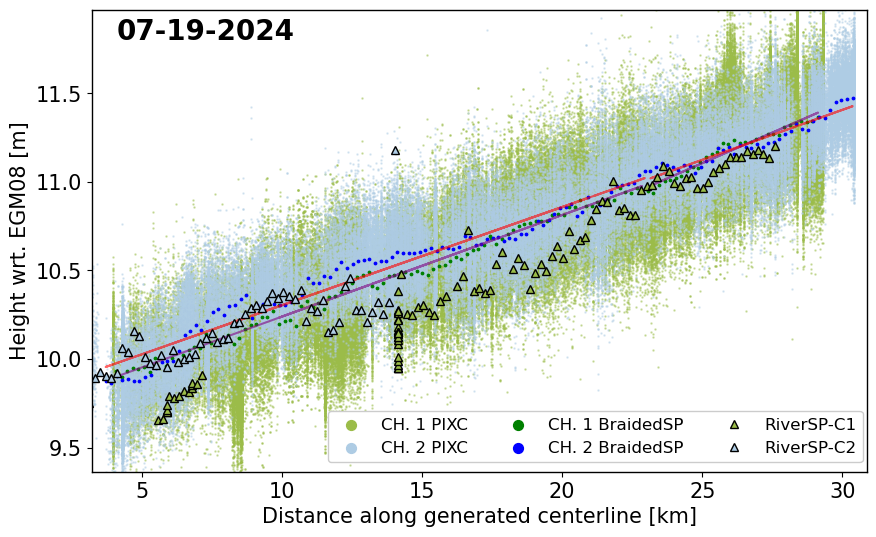

In [44]:

if channelSet == 'set1':
    slopes = []
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
    ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

    for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

        if joint_channel == 0:
            continue


        if joint_channel == 1:
            slope_col = '#9BBC49'
            slope_col = 'purple'
        else:
            slope_col = '#AECCE4'
            slope_col = 'red'

        channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]


        # Slope 1: 
        subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 23*1000]
        regr = LinearRegression()
        regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
        h_pred = regr.predict(subset1[['dist_jointChannel']])
        ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
        slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
        # if joint_channel == 1:
        #     ax.text(np.mean(subset1.dist_jointChannel/1000)-3.5,np.mean(h_pred)+0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
        # else:
        #     ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')

        # Slope 2
        subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 23*1000]
        regr = LinearRegression()
        regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
        h_pred = regr.predict(subset2[['dist_jointChannel']])
        ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
        slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
        #if joint_channel == 1:
            ##ax.text(np.mean(subset2.dist_jointChannel/1000)+2,np.mean(h_pred)+2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
            #ax.text(np.mean(subset2.dist_jointChannel/1000)-4,np.mean(h_pred)+0.1,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
        #else:
            #ax.text(np.mean(subset2.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
        
        
        ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel))+' BraidedSP')

        # sub_rsp = gdf_filt.iloc[gdf_filt.month == int(pixcdate[4:6])]
        # ax.scatter(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,s=3,c='#FFC107',label='RiverSP-br')

        # sub_rsp_b2 = gdf_filt_b2.iloc[gdf_filt_b2.month == int(pixcdate[4:6])]
        # ax.scatter(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,s=3,c='#004D40',label='RiverSP-bl')

        #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
        #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
        if joint_channel == 1:
            textH = 0.83
        else:
            textH = 0.77



    # PLOT RIVER SP 

    sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]
    ax.plot(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#9BBC49',label='RiverSP-C1')

    sub_rsp_b2 = gdf_filt_b2[gdf_filt_b2.month == int(pixcdate[4:6])]
    ax.plot(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#AECCE4',label='RiverSP-C2')

    ##################### legend #####################
    marker_size = 100
    def update_prop(handle, orig):
        handle.update_from(orig)
        handle.set_sizes([marker_size])

    from matplotlib.legend_handler import HandlerPathCollection
    import matplotlib.lines as mlines
    #if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
        #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, markerscale=2)
        #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, fontsize=12, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})
    
    lgd = ax.legend(loc='upper center',bbox_to_anchor=(0.65, 0.15),facecolor="white",framealpha=1,ncol=3, fontsize=12, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})

    for legend_handle in lgd.legendHandles:
        print(legend_handle)
        if isinstance(legend_handle, mlines.Line2D):
            continue
        legend_handle.set_sizes([50])
        legend_handle.set_alpha(1)

    for spine in ax.spines.values():
        spine.set_visible(True)  # Ensure the spine is visible
        spine.set_linewidth(1)   # Set the thickness of the border


    ax.set_xlabel("Distance along generated centerline [km]",fontsize=15)
    ax.set_ylabel("Height wrt. EGM08 [m]",fontsize=15)
    ax.tick_params(axis='both',which='major',labelsize=15)
    #ax.set_title(str(pixcdate))
    plt.figtext(0.15, 0.83,str(pixcdate[4:6]+'-'+pixcdate[6:8]+'-'+pixcdate[0:4]),fontweight='demi',fontsize=20)
    ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
    ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
    #plt.figtext(0.15, 0.77, f'RiverSP slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
    #plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
    plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png',format='png', dpi=500)
    plt.show()


In [35]:
type(legend_handle)

matplotlib.lines.Line2D

Runnning braided river analysis for: 20240203
Closest mask date: 0224
maskdate: 0224
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_10035/4144282821.py:150: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[22709.91372736 22909.91372736 23109.91372736 23309.91372736
 23509.91372736 23709.91372736 23909.91372736 24109.91372736
 24309.91372736 24509.91372736 24709.91372736 24909.91372736
 25109.91372736 25309.91372736 25509.91372736 25709.91372736
 25909.91372736 26109.91372736 26309.91372736 26509.91372736
 26709.91372736 26909.91372736 27109.91372736 27309.91372736
 27509.91372736 27709.91372736 27909.91372736 28109.91372736
 28309.91372736 28509.91372736 28709.91372736 28909.91372736
 29109.91372736 29309.91372736 29509.91372736 29709.91372736
 29909.91372736 30109.91372736 19523.0057808  19723.0057808
 19923.0057808  20123.0057808  20323.0057808  20523.0057808
 20723.0057808  20923.0057808  21123.0057808  21323.0057808
 21523.0057808  21723.0057808  21923.0057808  22123.005780

Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...
CH. 1 slope = 4.45 cm/km
CH. 2 slope = 5.69 cm/km


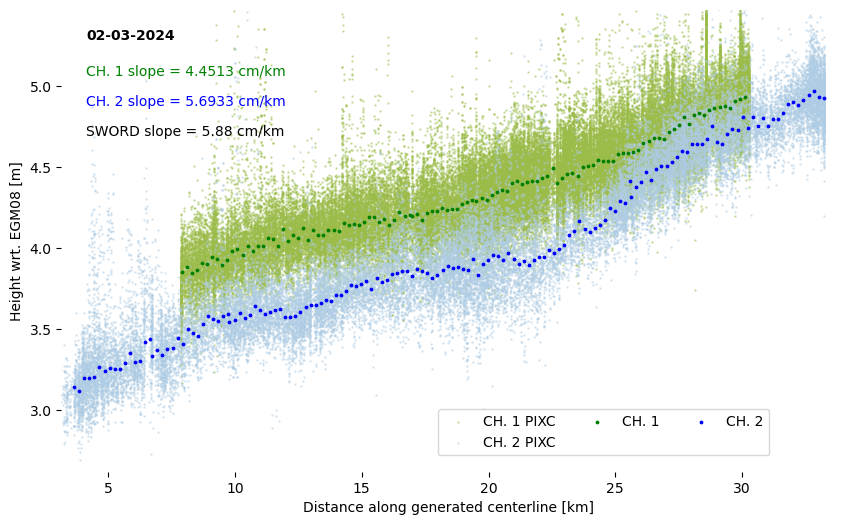

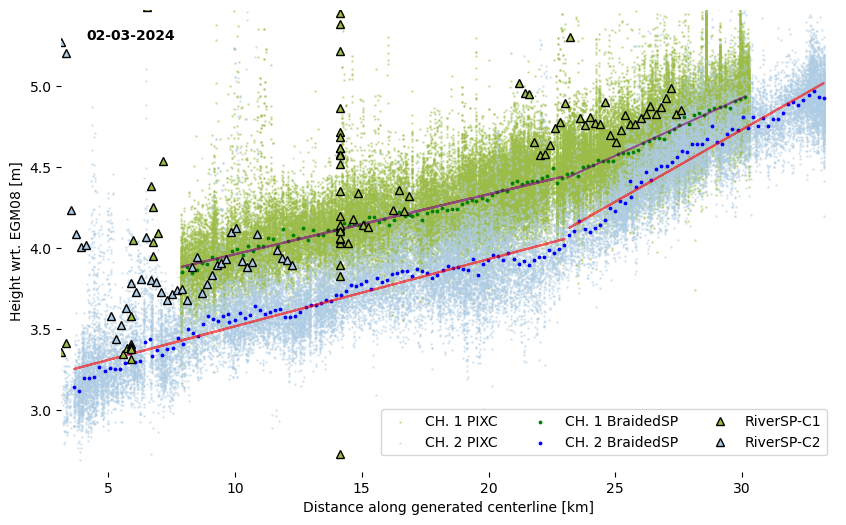

Extracting centerline from cl gdf... (merging and sorting)
Extracting centerline from cl gdf... (merging and sorting)


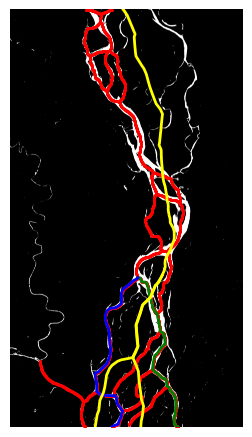

Runnning braided river analysis for: 20240719
Closest mask date: 0924
maskdate: 0924
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Slope negative! Flipping centerline and re-projecting...
Projected!
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_10035/4144282821.py:150: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4375.22840802  4175.22840802  3975.22840802  3775.22840802
  3575.22840802  3375.22840802  3175.22840802  2975.22840802
  2775.22840802  2575.22840803  2375.22840802  2175.22840802
  1975.22840802  1775.22840803  1575.22840803  1375.22840802
  1175.22840802   975.22840802   775.22840802   575.22840803
   375.22840802   175.22840802 11850.89997558 11650.89997558
 11450.89997558 11250.89997558 11050.89997558 10850.89997558
 10650.89997558 10450.89997558 10250.89997558 10050.89997558
  9850.89997558  9650.89997558  9450.89997558  9250.89997558
  9050.89997558  8850.89997558  8650.89997558  8450.89997558
  8250.89997558  8050.89997558  7850.89997558  7650.89997558
  7450.89997558  7250.89997558  7050.89997558  6850.89997558
  6650.89997558  6450.89997558  6250.89997558  6050.899

Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...
CH. 1 slope = 5.84 cm/km
CH. 2 slope = 5.51 cm/km


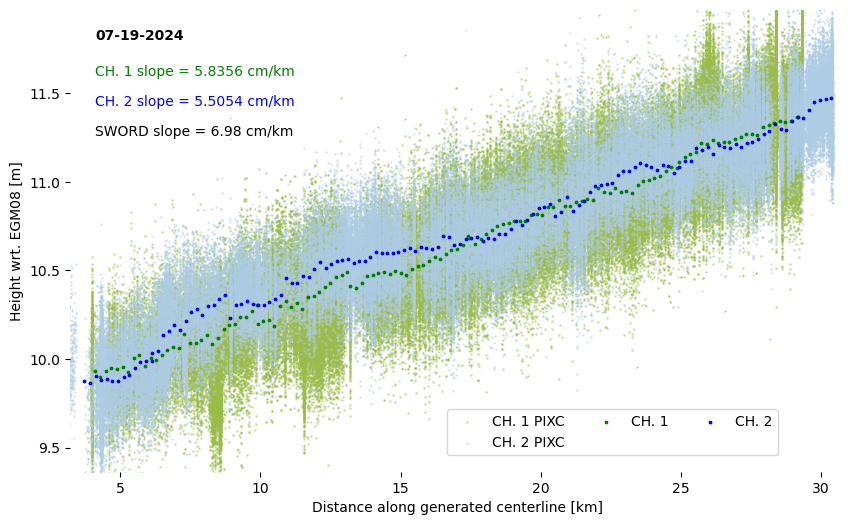

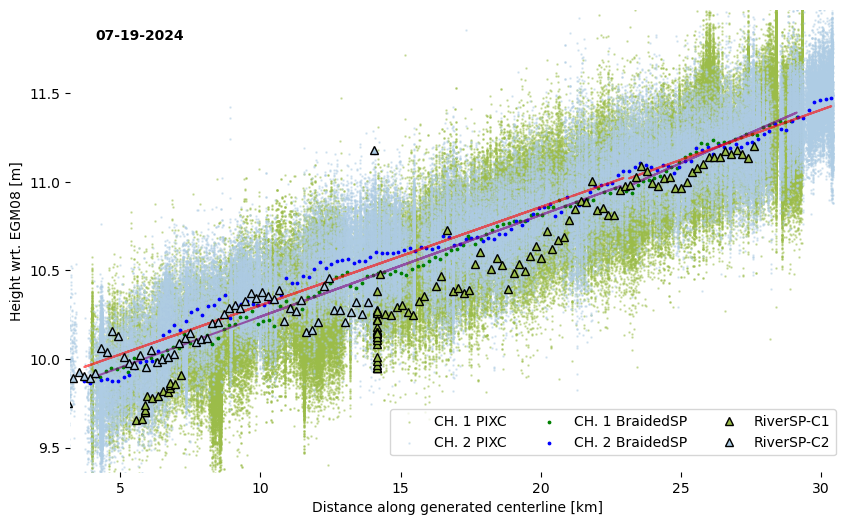

Extracting centerline from cl gdf... (merging and sorting)
Extracting centerline from cl gdf... (merging and sorting)


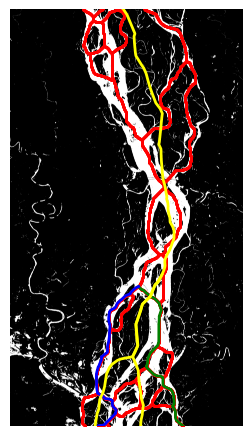

In [ ]:
# ------------------------------ PLOT selected channels for HF and LF ------------------------------










from sklearn.linear_model import LinearRegression

# LARGE CHANNELS (entire)
# channel1_dict = dict({'0224':['1','4','8','10','11','12','14','16','17','19','18','22','25','27','28','30','32'],
#                       '0924':[]})
# channel2_dict = dict({'0224':[],
#                       '0924':[]})

allSets = ['set2','set3','set4']
allSets = ['set1','set2','set3']
allSets = ['set1']


for channelSet in allSets:

#channelSet = 'set2'

    if channelSet == 'set1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25','27','28','30','32'],
                              '0324': ['20','23','25','26','28','30'],
                            '0924':['23','26','28','31','35','41'],
                            '1024':['24','27','31','34','38']})
        channel2_dict = dict({'0224':['21','23','24','34','35','38'],
                              '0324':['21','22','32','33','36'],
                            '0924':['22','24','27','37','38','43'],
                            '1024':['23','25','29','36','41','43']})


    if channelSet == 'set1p1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25'],
                            '0924':['23','26'],
                            '1024':['24','27']})
        channel2_dict = dict({'0224':['21'],
                            '0924':['22','24'],
                            '1024':['23','25']})

    if channelSet == 'set2':
        # SMALLER CHANNELS (divide that merges in HF)
        channel1_dict = dict({'0224':['14','16'],
                              '0324': ['12','15'],
                            '0924':['14','16'],
                            '1024':['16','18']})
        channel2_dict = dict({'0224':['13'],
                              '0324':['13'],
                            '0924':['14','16'],
                            '1024':['16','18']})

    if channelSet == 'set3':
        # Meander and the straight (No1)
        channel1_dict = dict({'0224':['16','17'],
                              '0324':['15','16'],
                            '0924':['16','17'],
                            '1024': ['18','19']})
        channel2_dict = dict({'0224':['15'],
                              '0324':['14'],
                            '0924':['15'],
                            '1024': ['17']})

    if channelSet == 'set4':
        # Meander and the straight (No2)
        channel1_dict = dict({'0224':['18','22'],
                              '0324':['17','20'],
                            '0924':['19','23'],
                            '1024':['21','24']})
        channel2_dict = dict({'0224':['20'],
                              '0324':['19'],
                            '0924':['20','21'],
                            '1024':['20','22']})

    sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson','/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson']

    #sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson']


    for filename in sel_riverSP:

        pixcdate = os.path.basename(filename)[0:8]

        print('Runnning braided river analysis for:',str(pixcdate))
        maskdate, water_mask_tiff = pc.getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)
        print('maskdate:',maskdate)


        # Load RiverSP product
        riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        print('reading in file:',odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        riversp_gdf = riversp_gdf.to_crs('EPSG:4326')

        # load generated CLs
        cl_gen = gpd.read_file(odir+tileID+'/'+maskdate+'_generated_cl.geojson')
        cl_gen = cl_gen.to_crs('EPSG:4326') 
        sword_cl_gdf = sword_cl_gdf.to_crs('EPSG:4326')

        # Selected channels
        ch1 = channel1_dict[maskdate]
        ch2 = channel2_dict[maskdate]

        ch1 = list(map(int, ch1))
        ch2 = list(map(int, ch2))
        branch_colors = ['green','blue']

        # prep data for projection along channel cl
        riversp_gdf['joint_channel_id'] = 0
        riversp_gdf['dist_jointChannel'] = 0

        for i in range(2):
            if i == 0:
                selChannels_list = ch1
            if i == 1:
                selChannels_list = ch2

            selChannels = selChannels_list #list(map(int, selChannels_list))

            print('Extracting centerline from cl gdf... (merging and sorting)')
            # get connected CL
            idb = cl_gen['branch_id'].isin(selChannels_list)
            sel_cl = cl_gen.loc[idb]

            # Fill any gaps in selected centerline and sort reaches by branch id
            sel_cl = sel_cl.reset_index(drop=True)
            merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
            #print('merged_parts',merged_parts)
            if isinstance(merged_parts,LineString):
                merged_line = merged_parts
            else:
                merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

            merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)
            #print('Plotting joint channel '+str(i+1))
            #merged_line_gdf.plot()
            sorted_gdf = merged_line_gdf


            # OLD VERSION
            # merged_gdf = fill_cl_gaps(sel_cl,hemi)
            # sorted_gdf, line_sorted = sort_general_cl(merged_gdf,showPlots=False,reverse=True) # Does this need to be a single line?

            print('Projecting SWOT RiverSP to joint centerline...')
            # Select all PIXC data associated with these channels and plot projected to CL
            idx = riversp_gdf['channelID'].isin(selChannels_list)
            riversp_gdf.loc[idx, 'joint_channel_id'] = i + 1


            riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
            #swot_pixc.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(sorted_gdf,swot_pixc.loc[idx,['geometry']],hemi)
            print('Projected!')
            #print(riversp_gdf.loc[idx])
            print('Checking slope...')
            # CHECK SLOPE - IF NEGATIVE THEN REVERSE DURING 'FILL GAPS'
            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == i + 1]
            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])

            if np.round(regr.coef_[0][0]*1000*100,decimals=4) < 0:
                # REVERSE CENTERLINE:
                print('Slope negative! Flipping centerline and re-projecting...')
                merged_line_gdf = merged_line_gdf.reverse()
                riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
                print('Projected!')

            if i == 0:
                merged_line_gdf_ch1 = merged_line_gdf
            if i == 1:
                merged_line_gdf_ch2 = merged_line_gdf

            
                



        ## ------------------- Project against SWORD
        riversp_gdf['dist_SWORDcl'] = pc.projectToCenterline(sword_cl_points,riversp_gdf[['geometry']],hemi)
        regr_sword = LinearRegression()
        regr_sword.fit(riversp_gdf[['dist_SWORDcl']], riversp_gdf[['heightEGM_med']])
        h_pred_sword = regr_sword.predict(riversp_gdf[['dist_SWORDcl']])

        ## ------------------- PLOT against generated centerline

        # LOAD PIXC data as well and plot with the riverSP prod...

        swot_pixc_ch1 = gpd.GeoDataFrame()
        for channel in ch1:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch1 = pd.concat([swot_pixc_ch1,swot_temp])

        # project to CL
        print('Projecting SWOT PIXC data (CH1) to joint centerline...')
        swot_pixc_ch1['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch1,swot_pixc_ch1[['geometry']],hemi)





        swot_pixc_ch2 = gpd.GeoDataFrame()
        for channel in ch2:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch2 = pd.concat([swot_pixc_ch2,swot_temp])
                
        # project to CL
        print('Projecting SWOT PIXC data (CH2) to joint centerline...')
        swot_pixc_ch2['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch2,swot_pixc_ch2[['geometry']],hemi)


        ##################### PLOT NO. 1 BEGINS HERE #####################
        # for detemining plot xlim and ylim
        both_channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] != 0]

        xrange = (np.min(both_channels_gdf.dist_jointChannel)-500,np.max(both_channels_gdf.dist_jointChannel)+500)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-1,np.max(both_channels_gdf.heightEGM_med)+1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.1,np.max(both_channels_gdf.heightEGM_med)+0.1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.5,np.max(both_channels_gdf.heightEGM_med)+0.5)

        slopes = []
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
        ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

        for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

            if joint_channel == 0:
                continue

            if len(np.unique(riversp_gdf['joint_channel_id'])) == 2: # joint channels are the same...
                regr = LinearRegression()
                regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
                h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
                print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=2))+' cm/km')
                slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[1], s=2.0, label=str(int(joint_channel)))
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                plt.figtext(0.15, 0.77, f'CH. slope = {slopes[0]} cm/km',color=branch_colors[1])
                break

            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]
            if joint_channel == 1:
                medY = np.round(np.median(channels_gdf.heightEGM_med),0)

            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
            h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
            print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=2))+' cm/km')
            slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
            ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel)))

            #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
            if joint_channel == 1:
                textH = 0.77
            else:
                textH = 0.72
            plt.figtext(0.15, textH, f'CH. {str(joint_channel)} slope = {slopes[int(joint_channel-1)]} cm/km',color=branch_colors[int(joint_channel-1)])


        ##################### legend #####################
        marker_size = 36
        def update_prop(handle, orig):
            handle.update_from(orig)
            handle.set_sizes([marker_size])

        from matplotlib.legend_handler import HandlerPathCollection
        if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
            #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, markerscale=2)
            ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})

        #if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
        #    ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, markerscale=5)


        ax.set_xlabel("Distance along generated centerline [km]")
        ax.set_ylabel("Height wrt. EGM08 [m]")
        plt.figtext(0.15, 0.83,str(pixcdate[4:6]+'-'+pixcdate[6:8]+'-'+pixcdate[0:4]),fontweight='demi')

        #ax.set_title('Projected along generated centerlines: '+str(pixcdate))
        # !!!!! USE THESE ONLY ONCE YOU KNOW THE LIMITS FOR SELECTED CLs
        both_channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] != 0]

        xrange = (np.min(both_channels_gdf.dist_jointChannel)-500,np.max(both_channels_gdf.dist_jointChannel)+500)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-1,np.max(both_channels_gdf.heightEGM_med)+1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.1,np.max(both_channels_gdf.heightEGM_med)+0.1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.5,np.max(both_channels_gdf.heightEGM_med)+0.5)


        ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
        ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
        plt.figtext(0.15, 0.67, f'SWORD slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=2)} cm/km',color='black')
        #plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'.png')
        plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'.png', format='png', dpi=500)

        #plt.savefig(figdir+'/'+str(pixcdate)+'_projected2jointCL.png')
        plt.show()


        ##################### PLOT NO. 2 BEGINS HERE - no slopes in the corner #####################
        if channelSet == 'set1':
            slopes = []
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
            ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

            for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

                if joint_channel == 0:
                    continue


                if joint_channel == 1:
                    slope_col = '#9BBC49'
                    slope_col = 'purple'
                else:
                    slope_col = '#AECCE4'
                    slope_col = 'red'

                channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]


                # Slope 1: 
                subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 23*1000]
                regr = LinearRegression()
                regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
                h_pred = regr.predict(subset1[['dist_jointChannel']])
                ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                # if joint_channel == 1:
                #     ax.text(np.mean(subset1.dist_jointChannel/1000)-3.5,np.mean(h_pred)+0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                # else:
                #     ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')

                # Slope 2
                subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 23*1000]
                regr = LinearRegression()
                regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
                h_pred = regr.predict(subset2[['dist_jointChannel']])
                ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                #if joint_channel == 1:
                    ##ax.text(np.mean(subset2.dist_jointChannel/1000)+2,np.mean(h_pred)+2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                    #ax.text(np.mean(subset2.dist_jointChannel/1000)-4,np.mean(h_pred)+0.1,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                #else:
                    #ax.text(np.mean(subset2.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                
                
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel))+' BraidedSP')

                # sub_rsp = gdf_filt.iloc[gdf_filt.month == int(pixcdate[4:6])]
                # ax.scatter(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,s=3,c='#FFC107',label='RiverSP-br')

                # sub_rsp_b2 = gdf_filt_b2.iloc[gdf_filt_b2.month == int(pixcdate[4:6])]
                # ax.scatter(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,s=3,c='#004D40',label='RiverSP-bl')

                #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                if joint_channel == 1:
                    textH = 0.83
                else:
                    textH = 0.77



            # PLOT RIVER SP 

            sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]
            ax.plot(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#9BBC49',label='RiverSP-C1')

            sub_rsp_b2 = gdf_filt_b2[gdf_filt_b2.month == int(pixcdate[4:6])]
            ax.plot(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,linestyle='',markersize=6,marker='^',markeredgecolor='black',c='#AECCE4',label='RiverSP-C2')

            ##################### legend #####################
            marker_size = 12
            def update_prop(handle, orig):
                handle.update_from(orig)
                handle.set_sizes([marker_size])

            from matplotlib.legend_handler import HandlerPathCollection
            if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
                #ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, markerscale=2)
                ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.15),ncol=3, handler_map={type(ax): HandlerPathCollection(update_func=update_prop)})

            ax.set_xlabel("Distance along generated centerline [km]")
            ax.set_ylabel("Height wrt. EGM08 [m]")
            #ax.set_title(str(pixcdate))
            plt.figtext(0.15, 0.83,str(pixcdate[4:6]+'-'+pixcdate[6:8]+'-'+pixcdate[0:4]),fontweight='demi')
            ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
            ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
            #plt.figtext(0.15, 0.77, f'RiverSP slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
            #plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
            plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png',format='png', dpi=500)
            plt.show()


        ## ------------------- PLOT selected cl


        water_mask = skel.get_watermask(water_mask_tiff)
        fig, ax = plt.subplots(figsize=(3, 6))

        # water mask
        ax.imshow(water_mask, cmap=plt.cm.gray)
        
        # entire skeleton
        coords_df = cl_gen.get_coordinates()
        cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax.scatter(cl_pixel_coords.x,cl_pixel_coords.y,color='red',s=0.2)
        # for _, row in cl_gen.iterrows():
        #     ax.plot(*row.geometry.xy, color='red', linewidth=2)

        for i in range(2):
            if i == 0:
                selChannels_list = ch1
            if i == 1:
                selChannels_list = ch2

            selChannels = selChannels_list 

            print('Extracting centerline from cl gdf... (merging and sorting)')
            # get connected CL
            idb = cl_gen['branch_id'].isin(selChannels_list)
            sel_cl = cl_gen.loc[idb]

            # Fill any gaps in selected centerline and sort reaches by branch id
            sel_cl = sel_cl.reset_index(drop=True)
            merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
            if isinstance(merged_parts,LineString):
                merged_line = merged_parts
            else:
                merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

            merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)    

            # get line in  pixel coords
            coords_df = merged_line_gdf.get_coordinates()
            merged_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)

            # for _, row in merged_line_gdf.iterrows():
            #     ax.plot(*row.geometry.xy, color=branch_colors[int(i)], linewidth=2)

            # selected channels
            ax.plot(merged_pixel_coords.x,merged_pixel_coords.y,color=branch_colors[int(i)],linewidth=2)


        # SWORD CL
        coords_df = sword_cl_gdf.get_coordinates()
        sword_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax.plot(sword_pixel_coords.x,sword_pixel_coords.y,color='yellow',linewidth=2)

        coords_df = clbl.get_coordinates()
        sword_pixel_coords_bl = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax.plot(sword_pixel_coords_bl.x,sword_pixel_coords_bl.y,color='yellow',linewidth=2)


        y, x = np.where((water_mask)) 
        min_x, max_x = x.min(), x.max()
        min_y, max_y = y.min(), y.max()
        ax.set_xlim(min_x, max_x)
        ax.set_ylim(max_y, min_y)

        # Set plot properties
        #ax.set_title("Selected centerlines "+str(pixcdate))
        # Remove x and y tick marks
        ax.set_xticks([])
        ax.set_yticks([])

        plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_selected_channels_'+channelSet+'.png', format='png', dpi=500)
        #plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_selected_channels_'+channelSet+'.png')
        plt.show()

Runnning braided river analysis for: 20240203
Closest mask date: 0224
maskdate: 0224
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Extracting centerline from cl gdf... (merging and sorting)


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_51141/973002935.py:150: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[22709.91372736 22909.91372736 23109.91372736 23309.91372736
 23509.91372736 23709.91372736 23909.91372736 24109.91372736
 24309.91372736 24509.91372736 24709.91372736 24909.91372736
 25109.91372736 25309.91372736 25509.91372736 25709.91372736
 25909.91372736 26109.91372736 26309.91372736 26509.91372736
 26709.91372736 26909.91372736 27109.91372736 27309.91372736
 27509.91372736 27709.91372736 27909.91372736 28109.91372736
 28309.91372736 28509.91372736 28709.91372736 28909.91372736
 29109.91372736 29309.91372736 29509.91372736 29709.91372736
 29909.91372736 30109.91372736 19523.0057808  19723.0057808
 19923.0057808  20123.0057808  20323.0057808  20523.0057808
 20723.0057808  20923.0057808  21123.0057808  21323.0057808
 21523.0057808  21723.0057808  21923.0057808  22123.0057808

Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...
CH. 1 slope = 4.45 cm/km
CH. 2 slope = 5.69 cm/km


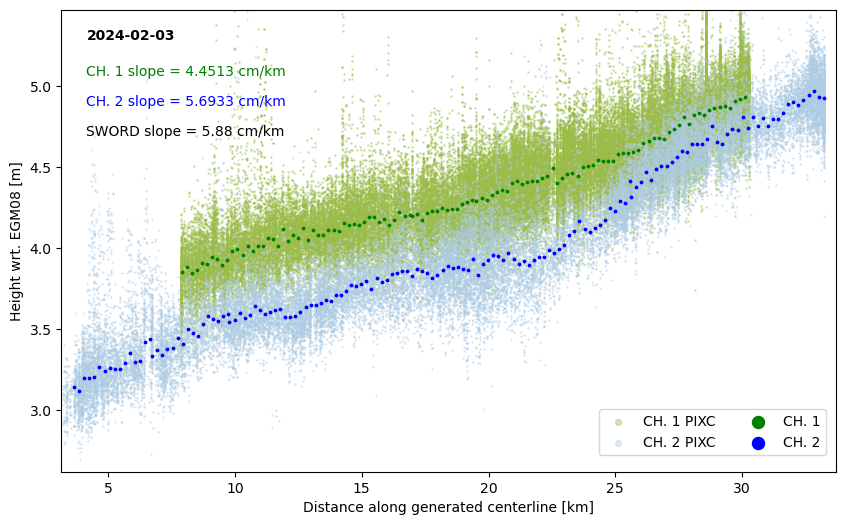

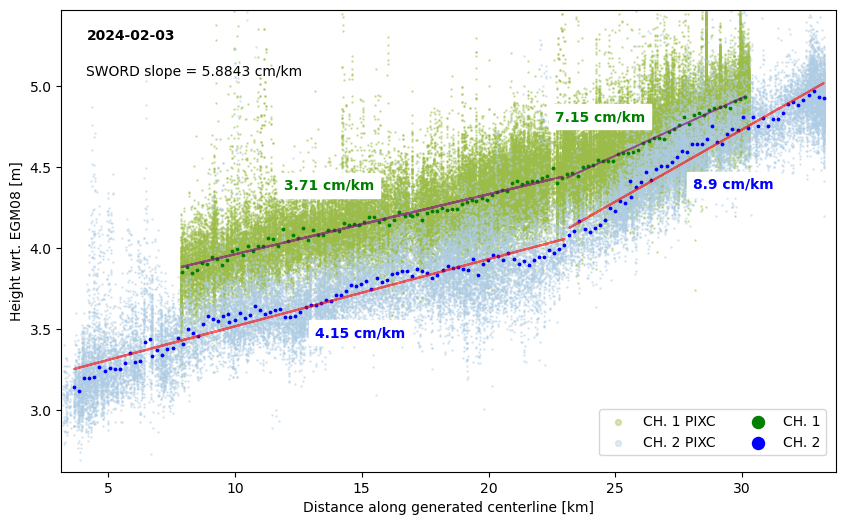

Extracting centerline from cl gdf... (merging and sorting)
Extracting centerline from cl gdf... (merging and sorting)


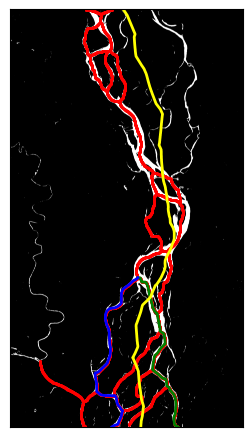

Runnning braided river analysis for: 20240719
Closest mask date: 0924
maskdate: 0924
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Slope negative! Flipping centerline and re-projecting...


/var/folders/z8/rwrj_7dn6nv6_d2803hqbzc00000gn/T/ipykernel_51141/973002935.py:150: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4375.22840802  4175.22840802  3975.22840802  3775.22840802
  3575.22840802  3375.22840802  3175.22840802  2975.22840802
  2775.22840802  2575.22840803  2375.22840802  2175.22840802
  1975.22840802  1775.22840803  1575.22840803  1375.22840802
  1175.22840802   975.22840802   775.22840802   575.22840803
   375.22840802   175.22840802 11850.89997558 11650.89997558
 11450.89997558 11250.89997558 11050.89997558 10850.89997558
 10650.89997558 10450.89997558 10250.89997558 10050.89997558
  9850.89997558  9650.89997558  9450.89997558  9250.89997558
  9050.89997558  8850.89997558  8650.89997558  8450.89997558
  8250.89997558  8050.89997558  7850.89997558  7650.89997558
  7450.89997558  7250.89997558  7050.89997558  6850.89997558
  6650.89997558  6450.89997558  6250.89997558  6050.8999

Projected!
Extracting centerline from cl gdf... (merging and sorting)
Projecting SWOT RiverSP to joint centerline...
Projected!
Checking slope...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH1) to joint centerline...
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Reading in SWOT PIXC data....
Projecting SWOT PIXC data (CH2) to joint centerline...
CH. 1 slope = 5.84 cm/km
CH. 2 slope = 5.51 cm/km


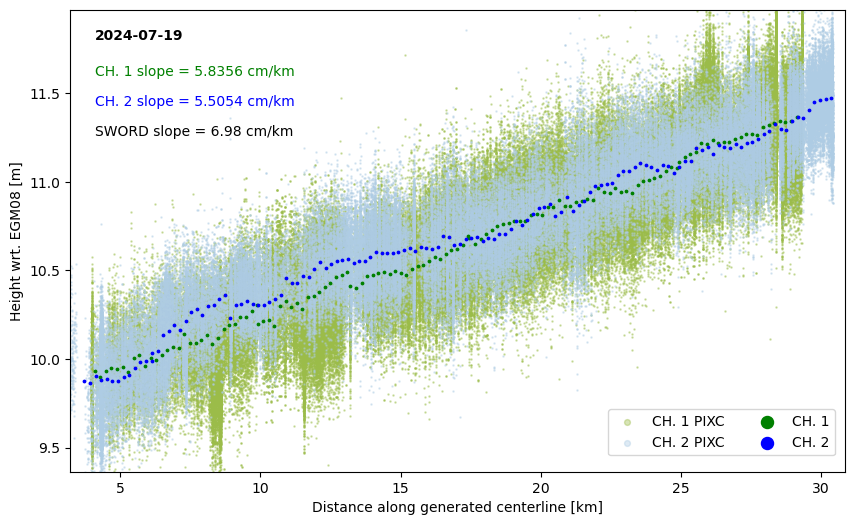

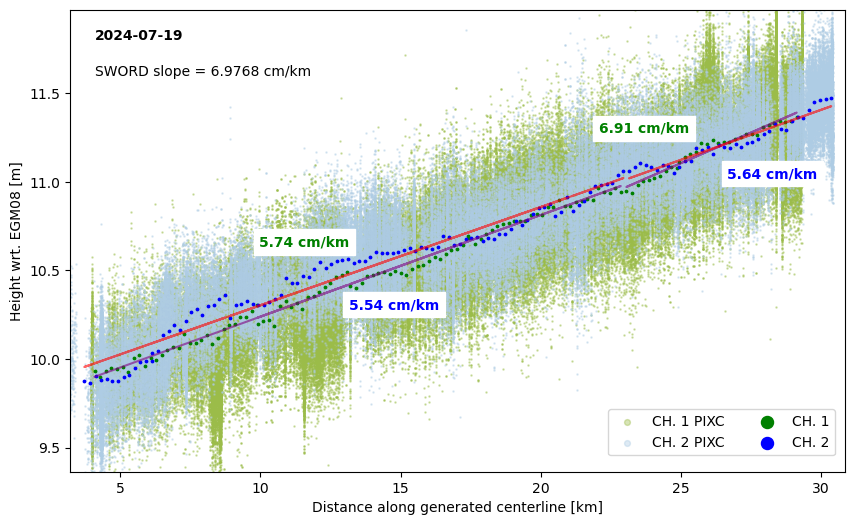

Extracting centerline from cl gdf... (merging and sorting)
Extracting centerline from cl gdf... (merging and sorting)


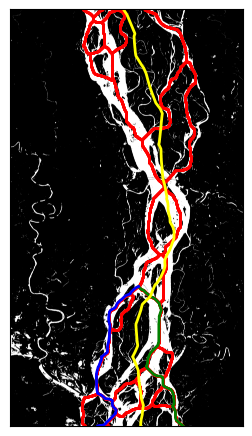

In [ ]:
# ------------------------------ PLOT selected channels for HF and LF ------------------------------



from sklearn.linear_model import LinearRegression

# LARGE CHANNELS (entire)
# channel1_dict = dict({'0224':['1','4','8','10','11','12','14','16','17','19','18','22','25','27','28','30','32'],
#                       '0924':[]})
# channel2_dict = dict({'0224':[],
#                       '0924':[]})

allSets = ['set2','set3','set4']
allSets = ['set1','set2','set3']
allSets = ['set1']


for channelSet in allSets:

#channelSet = 'set2'

    if channelSet == 'set1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25','27','28','30','32'],
                              '0324': ['20','23','25','26','28','30'],
                            '0924':['23','26','28','31','35','41'],
                            '1024':['24','27','31','34','38']})
        channel2_dict = dict({'0224':['21','23','24','34','35','38'],
                              '0324':['21','22','32','33','36'],
                            '0924':['22','24','27','37','38','43'],
                            '1024':['23','25','29','36','41','43']})


    if channelSet == 'set1p1':
        # SMALL main CHANNELS (parallel branches)
        channel1_dict = dict({'0224':['22','25'],
                            '0924':['23','26'],
                            '1024':['24','27']})
        channel2_dict = dict({'0224':['21'],
                            '0924':['22','24'],
                            '1024':['23','25']})

    if channelSet == 'set2':
        # SMALLER CHANNELS (divide that merges in HF)
        channel1_dict = dict({'0224':['14','16'],
                              '0324': ['12','15'],
                            '0924':['14','16'],
                            '1024':['16','18']})
        channel2_dict = dict({'0224':['13'],
                              '0324':['13'],
                            '0924':['14','16'],
                            '1024':['16','18']})

    if channelSet == 'set3':
        # Meander and the straight (No1)
        channel1_dict = dict({'0224':['16','17'],
                              '0324':['15','16'],
                            '0924':['16','17'],
                            '1024': ['18','19']})
        channel2_dict = dict({'0224':['15'],
                              '0324':['14'],
                            '0924':['15'],
                            '1024': ['17']})

    if channelSet == 'set4':
        # Meander and the straight (No2)
        channel1_dict = dict({'0224':['18','22'],
                              '0324':['17','20'],
                            '0924':['19','23'],
                            '1024':['21','24']})
        channel2_dict = dict({'0224':['20'],
                              '0324':['19'],
                            '0924':['20','21'],
                            '1024':['20','22']})

    sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson','/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson']

    #sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson']


    for filename in sel_riverSP:

        pixcdate = os.path.basename(filename)[0:8]

        print('Runnning braided river analysis for:',str(pixcdate))
        maskdate, water_mask_tiff = pc.getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)
        print('maskdate:',maskdate)


        # Load RiverSP product
        riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        print('reading in file:',odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
        riversp_gdf = riversp_gdf.to_crs('EPSG:4326')

        # load generated CLs
        cl_gen = gpd.read_file(odir+tileID+'/'+maskdate+'_generated_cl.geojson')
        cl_gen = cl_gen.to_crs('EPSG:4326') 
        sword_cl_gdf = sword_cl_gdf.to_crs('EPSG:4326')

        # Selected channels
        ch1 = channel1_dict[maskdate]
        ch2 = channel2_dict[maskdate]

        ch1 = list(map(int, ch1))
        ch2 = list(map(int, ch2))
        branch_colors = ['green','blue']

        # prep data for projection along channel cl
        riversp_gdf['joint_channel_id'] = 0
        riversp_gdf['dist_jointChannel'] = 0

        for i in range(2):
            if i == 0:
                selChannels_list = ch1
            if i == 1:
                selChannels_list = ch2

            selChannels = selChannels_list #list(map(int, selChannels_list))

            print('Extracting centerline from cl gdf... (merging and sorting)')
            # get connected CL
            idb = cl_gen['branch_id'].isin(selChannels_list)
            sel_cl = cl_gen.loc[idb]

            # Fill any gaps in selected centerline and sort reaches by branch id
            sel_cl = sel_cl.reset_index(drop=True)
            merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
            #print('merged_parts',merged_parts)
            if isinstance(merged_parts,LineString):
                merged_line = merged_parts
            else:
                merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

            merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)
            #print('Plotting joint channel '+str(i+1))
            #merged_line_gdf.plot()
            sorted_gdf = merged_line_gdf


            # OLD VERSION
            # merged_gdf = fill_cl_gaps(sel_cl,hemi)
            # sorted_gdf, line_sorted = sort_general_cl(merged_gdf,showPlots=False,reverse=True) # Does this need to be a single line?

            print('Projecting SWOT RiverSP to joint centerline...')
            # Select all PIXC data associated with these channels and plot projected to CL
            idx = riversp_gdf['channelID'].isin(selChannels_list)
            riversp_gdf.loc[idx, 'joint_channel_id'] = i + 1


            riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
            #swot_pixc.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(sorted_gdf,swot_pixc.loc[idx,['geometry']],hemi)
            print('Projected!')
            #print(riversp_gdf.loc[idx])
            print('Checking slope...')
            # CHECK SLOPE - IF NEGATIVE THEN REVERSE DURING 'FILL GAPS'
            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == i + 1]
            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])

            if np.round(regr.coef_[0][0]*1000*100,decimals=4) < 0:
                # REVERSE CENTERLINE:
                print('Slope negative! Flipping centerline and re-projecting...')
                merged_line_gdf = merged_line_gdf.reverse()
                riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
                print('Projected!')

            if i == 0:
                merged_line_gdf_ch1 = merged_line_gdf
            if i == 1:
                merged_line_gdf_ch2 = merged_line_gdf

            
                



        ## ------------------- Project against SWORD
        riversp_gdf['dist_SWORDcl'] = pc.projectToCenterline(sword_cl_points,riversp_gdf[['geometry']],hemi)
        regr_sword = LinearRegression()
        regr_sword.fit(riversp_gdf[['dist_SWORDcl']], riversp_gdf[['heightEGM_med']])
        h_pred_sword = regr_sword.predict(riversp_gdf[['dist_SWORDcl']])

        ## ------------------- PLOT against generated centerline

        # LOAD PIXC data as well and plot with the riverSP prod...

        swot_pixc_ch1 = gpd.GeoDataFrame()
        for channel in ch1:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch1 = pd.concat([swot_pixc_ch1,swot_temp])

        # project to CL
        print('Projecting SWOT PIXC data (CH1) to joint centerline...')
        swot_pixc_ch1['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch1,swot_pixc_ch1[['geometry']],hemi)



        swot_pixc_ch2 = gpd.GeoDataFrame()
        for channel in ch2:

            swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
            if os.path.exists(swot_file):
                # load file and save to swot_pixc
                print('Reading in SWOT PIXC data....')
                swot_temp = gpd.read_file(swot_file)
                # Store
                swot_pixc_ch2 = pd.concat([swot_pixc_ch2,swot_temp])
                
        # project to CL
        print('Projecting SWOT PIXC data (CH2) to joint centerline...')
        swot_pixc_ch2['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch2,swot_pixc_ch2[['geometry']],hemi)


        slopes = []
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
        ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

        for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

            if joint_channel == 0:
                continue

            if len(np.unique(riversp_gdf['joint_channel_id'])) == 2: # joint channels are the same...
                regr = LinearRegression()
                regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
                h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
                print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=2))+' cm/km')
                slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[1], s=2.0, label=str(int(joint_channel)))
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                plt.figtext(0.15, 0.77, f'CH. slope = {slopes[0]} cm/km',color=branch_colors[1])
                break

            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]
            if joint_channel == 1:
                medY = np.round(np.median(channels_gdf.heightEGM_med),0)

            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
            h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
            print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=2))+' cm/km')
            slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
            ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel)))

            #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
            if joint_channel == 1:
                textH = 0.77
            else:
                textH = 0.72
            plt.figtext(0.15, textH, f'CH. {str(joint_channel)} slope = {slopes[int(joint_channel-1)]} cm/km',color=branch_colors[int(joint_channel-1)])


        if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
            ax.legend(loc='upper center',bbox_to_anchor=(0.84, 0.15),ncol=2, markerscale=5)
        ax.set_xlabel("Distance along generated centerline [km]")
        ax.set_ylabel("Height wrt. EGM08 [m]")
        plt.figtext(0.15, 0.83,str(pixcdate[0:4]+'-'+pixcdate[4:6]+'-'+pixcdate[6:8]),fontweight='demi')

        #ax.set_title('Projected along generated centerlines: '+str(pixcdate))
        # !!!!! USE THESE ONLY ONCE YOU KNOW THE LIMITS FOR SELECTED CLs
        both_channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] != 0]

        xrange = (np.min(both_channels_gdf.dist_jointChannel)-500,np.max(both_channels_gdf.dist_jointChannel)+500)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-1,np.max(both_channels_gdf.heightEGM_med)+1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.1,np.max(both_channels_gdf.heightEGM_med)+0.1)
        yrange = (np.min(both_channels_gdf.heightEGM_med)-0.5,np.max(both_channels_gdf.heightEGM_med)+0.5)


        ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
        ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
        plt.figtext(0.15, 0.67, f'SWORD slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=2)} cm/km',color='black')
        plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'.png')
        #plt.savefig(figdir+'/'+str(pixcdate)+'_projected2jointCL.png')
        plt.show()



        if channelSet == 'set1':
            slopes = []
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
            ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

            for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

                if joint_channel == 0:
                    continue


                if joint_channel == 1:
                    slope_col = '#9BBC49'
                    slope_col = 'purple'
                else:
                    slope_col = '#AECCE4'
                    slope_col = 'red'

                channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]


                # Slope 1: 
                subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 23*1000]
                regr = LinearRegression()
                regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
                h_pred = regr.predict(subset1[['dist_jointChannel']])
                ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                if joint_channel == 1:
                    ax.text(np.mean(subset1.dist_jointChannel/1000)-3.5,np.mean(h_pred)+0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                else:
                    ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')

                # Slope 2
                subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 23*1000]
                regr = LinearRegression()
                regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
                h_pred = regr.predict(subset2[['dist_jointChannel']])
                ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6)
                slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                if joint_channel == 1:
                    ax.text(np.mean(subset2.dist_jointChannel/1000)-4,np.mean(h_pred)+0.1,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                else:
                    ax.text(np.mean(subset2.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                
                
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel))+' BraidedSP')
                # PLOT RIVER SP 
                sub_rsp = gdf_filt[gdf_filt.month == int(pixcdate[4:6])]
                plt.scatter(sub_rsp['dist']/1000, sub_rsp['wse'], alpha=1,s=3,c='black',label='RiverSP-b1')

                sub_rsp_b2 = gdf_filt_b2[gdf_filt_b2.month == int(pixcdate[4:6])]
                plt.scatter(sub_rsp_b2['dist']/1000, sub_rsp_b2['wse'], alpha=1,s=3,c='black',label='RiverSP-b2')

                #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                if joint_channel == 1:
                    textH = 0.83
                else:
                    textH = 0.77


            if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
                ax.legend(loc='upper center',bbox_to_anchor=(0.84, 0.15),ncol=2, markerscale=5)
            ax.set_xlabel("Distance along generated centerline [km]")
            ax.set_ylabel("Height wrt. EGM08 [m]")
            #ax.set_title(str(pixcdate))
            plt.figtext(0.15, 0.83,str(pixcdate[0:4]+'-'+pixcdate[4:6]+'-'+pixcdate[6:8]),fontweight='demi')
            ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
            ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
            #plt.figtext(0.15, 0.77, f'RiverSP slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
            plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
            plt.show()


        if channelSet == 'set3':
            slopes = []
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='#9BBC49', s=0.7, label='CH. 1 PIXC')
            ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#AECCE4', s=0.7, label='CH. 2 PIXC') # old #D3D3D3

            for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

                if joint_channel == 0:
                    continue

                channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]

                if joint_channel == 1:
                    slope_col = '#9BBC49'
                    slope_col = 'purple'
                else:
                    slope_col = '#AECCE4'
                    slope_col = 'red'


                # Slope 1: 
                subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 6*1000]
                regr = LinearRegression()
                regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
                h_pred = regr.predict(subset1[['dist_jointChannel']])
                ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6) # 'red
                slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                if joint_channel == 1:
                    ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                else:
                    ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)+0.2,f'{slope1} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')

                # Slope 2
                subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 6*1000]
                regr = LinearRegression()
                regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
                h_pred = regr.predict(subset2[['dist_jointChannel']])
                ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c=slope_col,alpha=0.6) # 'purple
                slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=2)
                if joint_channel == 1:
                    ax.text(np.mean(subset2.dist_jointChannel/1000)+0.1,np.mean(h_pred)-0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                else:
                    ax.text(np.mean(subset2.dist_jointChannel/1000)+0.1,np.mean(h_pred)+0.2,f'{slope2} cm/km',color=branch_colors[int(joint_channel-1)],backgroundcolor='white',fontsize='medium',fontweight='demi')
                
                
                ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=3.0, label='CH. '+str(int(joint_channel)))


                #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
                #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
                if joint_channel == 1:
                    textH = 0.83
                else:
                    textH = 0.77


            if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
                ax.legend(loc='upper center',bbox_to_anchor=(0.84, 0.15),ncol=2, markerscale=5)
            ax.set_xlabel("Distance along generated centerline [km]")
            ax.set_ylabel("Height wrt. EGM08 [m]")
            #ax.set_title(str(pixcdate))
            plt.figtext(0.15, 0.83,str(pixcdate[0:4]+'-'+pixcdate[4:6]+'-'+pixcdate[6:8]),fontweight='demi')
            ax.set_xlim(xrange[0]/1000,xrange[1]/1000)
            ax.set_ylim(yrange[0],yrange[1]) # Always keeping window size of 10 m height for better slope comparison
            plt.figtext(0.15, 0.77, f'SWORD slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
            plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
            plt.show()



        ## ------------------- PLOT selected cl


        water_mask = skel.get_watermask(water_mask_tiff)
        fig, ax = plt.subplots(figsize=(3, 6))

        # water mask
        ax.imshow(water_mask, cmap=plt.cm.gray)
        
        # entire skeleton
        coords_df = cl_gen.get_coordinates()
        cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax.scatter(cl_pixel_coords.x,cl_pixel_coords.y,color='red',s=0.2)
        # for _, row in cl_gen.iterrows():
        #     ax.plot(*row.geometry.xy, color='red', linewidth=2)

        for i in range(2):
            if i == 0:
                selChannels_list = ch1
            if i == 1:
                selChannels_list = ch2

            selChannels = selChannels_list 

            print('Extracting centerline from cl gdf... (merging and sorting)')
            # get connected CL
            idb = cl_gen['branch_id'].isin(selChannels_list)
            sel_cl = cl_gen.loc[idb]

            # Fill any gaps in selected centerline and sort reaches by branch id
            sel_cl = sel_cl.reset_index(drop=True)
            merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
            if isinstance(merged_parts,LineString):
                merged_line = merged_parts
            else:
                merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

            merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)    

            # get line in  pixel coords
            coords_df = merged_line_gdf.get_coordinates()
            merged_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)

            # for _, row in merged_line_gdf.iterrows():
            #     ax.plot(*row.geometry.xy, color=branch_colors[int(i)], linewidth=2)

            # selected channels
            ax.plot(merged_pixel_coords.x,merged_pixel_coords.y,color=branch_colors[int(i)],linewidth=2)


        # SWORD CL
        coords_df = sword_cl_gdf.get_coordinates()
        sword_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
        ax.plot(sword_pixel_coords.x,sword_pixel_coords.y,color='yellow',linewidth=2)

        y, x = np.where((water_mask)) 
        min_x, max_x = x.min(), x.max()
        min_y, max_y = y.min(), y.max()
        ax.set_xlim(min_x, max_x)
        ax.set_ylim(max_y, min_y)

        # Set plot properties
        #ax.set_title("Selected centerlines "+str(pixcdate))
        # Remove x and y tick marks
        ax.set_xticks([])
        ax.set_yticks([])

        plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_selected_channels_'+channelSet+'.png')
        plt.show()

In [11]:
# Generating water occurence map

# Get list of all mask dates
maskdates = glob.glob("/Volumes/OneTouch/work/water_masks/brahmaputra/258_112L/S2_WaterMask_NDWI_****.tif")
maskdates = [os.path.basename(mask)[18:22] for mask in maskdates]
maskdates_list = [ date for date in maskdates if date.isnumeric() ]
sorted_dates = sorted(maskdates_list, key=lambda x: (int(x[2:]), int(x[:2])))
sorted_dates = ['1223', '0124', '0224', '0324', '0424', '0524', '0924', '1024']
monthly_dates = ['20231201', '20240101', '20240201', '20240301', '20240401', '20240501', '20240601', '20240701', '20240801', '20240901', '20241001']

maskdate, water_mask_tiff = pc.getNearestMaskDate('20240203', tileID, LFmonths, HFmonths)
water_mask = skel.get_watermask(water_mask_tiff)

height, width = np.shape(water_mask)
all_water_masks = np.zeros((height, width, len(monthly_dates)), dtype=np.float32) # for monthly occurance -- as if we had a monthly mask for each month


i = 0
for date in monthly_dates:

    maskdate, water_mask_tiff = pc.getNearestMaskDate(date, tileID, LFmonths, HFmonths)
    water_mask_tiff = glob.glob("/Volumes/OneTouch/work/water_masks/brahmaputra/258_112L/S2_WaterMask_NDWI_"+maskdate+".tif")
    water_mask = skel.get_watermask(water_mask_tiff[0])

    all_water_masks[:,:,i] = water_mask

    i = i + 1



Closest mask date: 0224
Closest mask date: 1223
Closest mask date: 0124
Closest mask date: 0224
Closest mask date: 0324
Closest mask date: 0424
Closest mask date: 0524
Closest mask date: 0924
Closest mask date: 0924
Closest mask date: 0924
Closest mask date: 0924
Closest mask date: 1024


(6965, 3884, 11)


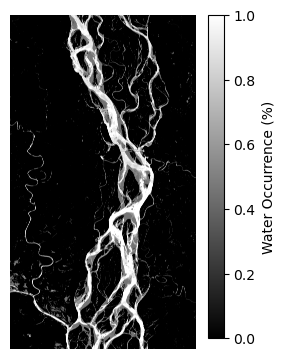

In [12]:
# plot and save water occurance map
import rasterio
from rasterio.transform import from_origin

print(np.shape(all_water_masks))
water_occurrence = np.sum(all_water_masks, axis=2) / all_water_masks.shape[2]

fig, ax = plt.subplots(figsize=(3, 6))


# Display the water occurrence map
im = ax.imshow(water_occurrence, cmap=plt.cm.gray)

# Add the color bar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Water Occurrence (%)')

# Reduce the height of the color bar
cbar.ax.set_position([cbar.ax.get_position().x0,  # x position (no change)
                      cbar.ax.get_position().y0 + 0.125,  # Shift up
                      cbar.ax.get_position().width,   # Keep the width
                      cbar.ax.get_position().height * 0.7])  # Scale height

#ax.set_title('Water Mask Occurrence')
ax.axis('off')
plt.savefig(figdir+'/'+tileID+'/_water_occurence.png')
plt.show()

# Save water occurance to geotiff

# Step 1: Read metadata from the original GeoTIFF
with rasterio.open(water_mask_tiff[0]) as src:
    meta = src.meta.copy()  # Copy the metadata
    transform = src.transform  # Get the transform (geolocation data)
    crs = src.crs  # Get the coordinate reference system

# Step 2: Update metadata for the new GeoTIFF
meta.update({
    'count': 1,  # Single band
    'dtype': 'float32',  # Water occurrence is a float (0.0 to 1.0)
    'driver': 'GTiff'
})

# Step 3: Save the new GeoTIFF
with rasterio.open('/Volumes/OneTouch/work/water_masks/brahmaputra/258_112L/water_occurence_map.tif', 'w', **meta) as dst:
    dst.write(water_occurrence.astype('float32'), 1)  # Write to band 1


In [13]:
## provided a lat/lon coordinate, extract the closest RiverSP node for each time set and plot TS
# Extracting nearest points here (within 1 km away)

from scipy.spatial import cKDTree
from shapely.geometry import Point


def get_nearest_point(riversp_gdf, point_gdf,distance_threshold=1000): # Choosing point nearest in latitude
    # point_gdf == gdf with one geometry entry
    # riversp_gdf == gdf with all nodes of the riversp product
    # both gdf in UTM crs
    # Code developed with support from ChatGPT

    nPoint = np.array(list(point_gdf.geometry.apply(lambda x: (x.x, x.y))))
    nNode = np.array(list(riversp_gdf.geometry.apply(lambda x: (x.x, x.y)))) # build tree based on riversp
    btree = cKDTree(nNode)


    # Find all points within the distance threshold
    indices_within_dist = btree.query_ball_point(nPoint, r=distance_threshold)
    results = []

    for i, indices in enumerate(indices_within_dist):
        if not indices:  # No points within the threshold
            continue

        target_point = nPoint[i]  # The point of interest
        point_lat = target_point[1]  # Latitude of the target point

        # Filter potential nodes and calculate distance and latitude difference
        candidates = riversp_gdf.iloc[indices].copy()
        candidates['dist2Point'] = np.sqrt((candidates.geometry.x - target_point[0])**2 + 
                                           (candidates.geometry.y - target_point[1])**2)
        candidates['lat_diff'] = abs(candidates.geometry.y - point_lat)

        # Sort by latitude difference first, then by geometric distance
        candidates = candidates.sort_values(by=['lat_diff', 'dist2Point'])

        # Take the best match
        results.append(candidates.iloc[0])

    if results:
        return gpd.GeoDataFrame(results, crs=riversp_gdf.crs).reset_index(drop=True)
    else:
        return gpd.GeoDataFrame(columns=riversp_gdf.columns, crs=riversp_gdf.crs)



riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/20240203_riverSP.geojson')
# Load in points shapefile

points = gpd.read_file('/Volumes/OneTouch/work/SWOTbraided/qgis/TS_points.shp')
points = points.loc[points.geometry.isna() == False]
points = points.to_crs(riversp_gdf.crs) # put in utm crs matching riversp

ts_points = gpd.GeoDataFrame()

for filename in riverSP_files:

    pixcdate = os.path.basename(filename)[0:8]

    print('Running analysis for ',str(pixcdate))

    # Load RiverSP product
    riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    print('reading in file:',odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    points['heightEGM_med'] = 0

    for id in np.unique(points.id):
        nearest = get_nearest_point(riversp_gdf,points[points.id == id],distance_threshold=1500) 
        print(nearest)



        if len(nearest) > 0:
        
            point_lat = points[points.id == id].get_coordinates().y.iloc[0]
            nearest_lat = nearest.get_coordinates().y.iloc[0]
            if abs(point_lat - nearest_lat) > 400:
                continue
        # # Locate best option (closest lat and dist < 1000)
        # minlat = 1000
        # for row in nearest:
        #     print(row)

        #     lat = row.get_coordinates().y.iloc[0]
        #     if abs(lat - point_lat) < minlat:
        #         idx = 1
        #         #continue
        #     if row.iloc[0].dist2Point > 1500:
        #         continue
            nearest['pixcdate'] = pixcdate
            nearest['pointID'] = id
            ts_points = pd.concat([nearest,ts_points])

            # PLOT SELECTED AND NEAREST POINT TOGETHER

            




ts_points




Running analysis for  20240203
reading in file: /Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson
   heightEGM_med      width  channelID nodeID                        geometry  \
0       4.730057  515.19323         21   2121  POINT (775765.972 2682746.280)   

   dist2Point   lat_diff  
0  174.795929  84.665875  
   heightEGM_med        width  channelID nodeID  \
0       4.714241  1406.393096         22   2222   

                         geometry  dist2Point   lat_diff  
0  POINT (779751.906 2682968.745)  152.130617  60.187951  
   heightEGM_med       width  channelID nodeID  \
0       4.469547  652.724906         21    213   

                         geometry  dist2Point   lat_diff  
0  POINT (774592.573 2679866.010)   80.962592  20.206779  
   heightEGM_med        width  channelID nodeID  \
0       4.507442  2143.712736         22    226   

                         geometry  dist2Point   lat_diff  
0  POINT (780458.258 2680034.36

heightEGM_med        width  channelID nodeID  heightEll_med  geoid_med  \
0       10.118139  3184.291818         42    426     -44.391022 -54.508453   
0        9.836391  1451.975934         39    397     -44.729435 -54.571915   
0       10.306057   803.671315         41   4139     -44.169117 -54.474972   
0       10.023743  2015.227254         39   3919     -44.518837 -54.543335   
0       10.296833  3119.682182         40    407     -44.167343 -54.460346   
..            ...          ...        ...    ...            ...        ...   
0        4.165012   317.383724         24   2469            NaN        NaN   
0        4.507442  2143.712736         22    226            NaN        NaN   
0        4.469547   652.724906         21    213            NaN        NaN   
0        4.714241  1406.393096         22   2222            NaN        NaN   
0        4.730057   515.193230         21   2121            NaN        NaN   

      wf_med  phstd_med  dhdp_med    sig0_med                        geometry  \
0   0.904865   0.029292 -5.430480   84.049820  POINT (781581.161 2675912.270)   
0   0.872516   0.035207 -4.333035   89.393890  POINT (774621.284 2675853.083)   
0   0.916096   0.025730 -5.563328  100.852676  POINT (782068.462 2678309.979)   
0   0.921498   0.037029 -4.386541  154.037003  POINT (774749.655 2678188.475)   
0   0.889458   0.031529 -5.511444   84.566223  POINT (781437.180 2679948.098)   
..       ...        ...       ...         ...                             ...   
0        NaN        NaN       NaN         NaN  POINT (773261.724 2678146.357)   
0        NaN        NaN       NaN         NaN  POINT (780458.258 2680034.365)   
0        NaN        NaN       NaN         NaN  POINT (774592.573 2679866.010)   
0        NaN        NaN       NaN         NaN  POINT (779751.906 2682968.745)   
0        NaN        NaN       NaN         NaN  POINT (775765.972 2682746.280)   

     dist2Point   lat_diff  pixcdate  pointID  
0     86.879650   1.861544  20230910        8  
0    693.861914  94.258193  20230910        7  
0    794.105532  31.949787  20230910        6  
0   1490.733171  66.652368  20230910        5  
0   1217.399603  46.537398  20230910        4  
..          ...        ...       ...      ...  
0     24.569610  24.534552  20240203        5  
0    240.886300  39.729202  20240203        4  
0     80.962592  20.206779  20240203        3  
0    152.130617  60.187951  20240203        2  
0    174.795929  84.665875  20240203        1  

[167 rows x 15 columns]

/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying t

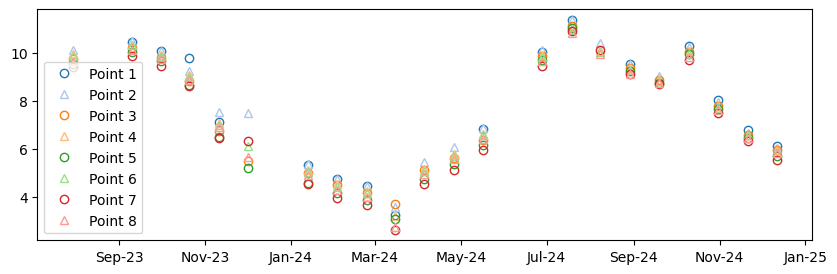

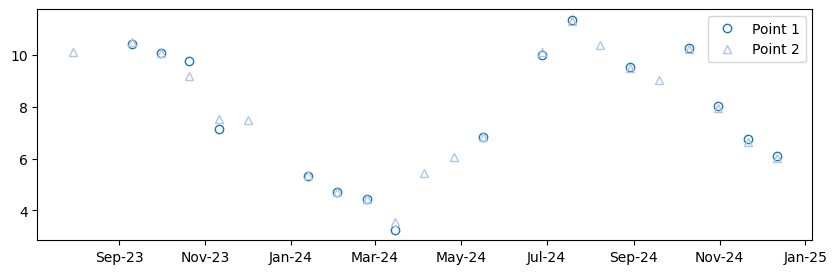

/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


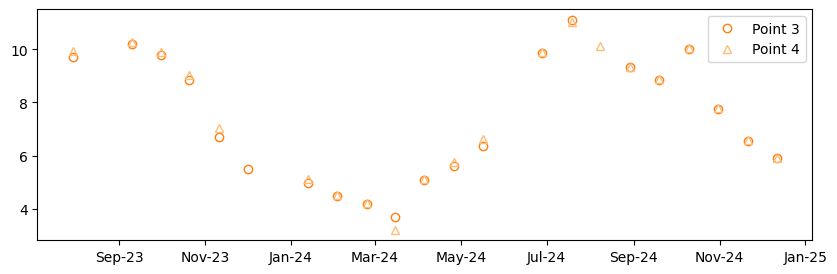

/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


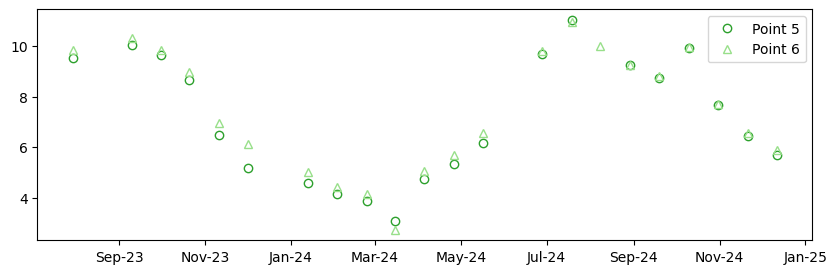

/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/sarahfranze/miniforge3/envs/swotPull/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


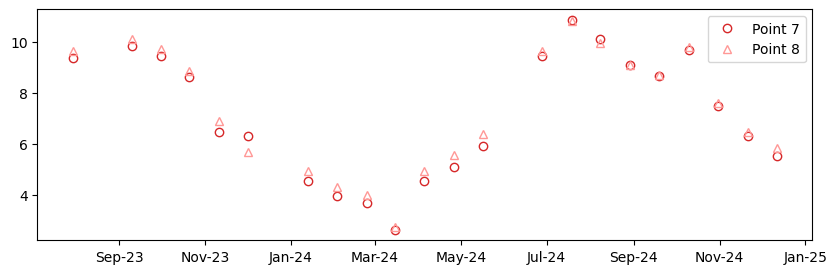

In [14]:
import matplotlib.dates as mdates

cmap = plt.cm.tab20  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

pointpairs = [[1,2],[3,4],[5,6],[7,8]]
markerType = ['o','^','o','^','o','^','o','^','o','^']


fig, ax = plt.subplots(figsize=(10,3))
for pointID in np.unique(ts_points.pointID):

    # extract TS at each point and plot

    sub = ts_points.loc[ts_points.pointID == pointID]
    sub['Date'] = pd.to_datetime(sub['pixcdate'])
    sub = sub.sort_values('Date')

    #fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(sub.Date, sub.heightEGM_med,markerType[pointID-1],label='Point '+str(pointID),markerfacecolor='none', markeredgecolor=cmaplist[pointID-1])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    # ax.set_ylim([2,6])

ax.legend()


for pair in pointpairs:
    fig, ax = plt.subplots(figsize=(10,3))


    sub1 = ts_points.loc[ts_points.pointID == pair[0]]
    sub2 = ts_points.loc[ts_points.pointID == pair[1]]

    # extract TS at each point and plot
    #sub = ts_points.loc[ts_points.pointID == pointID]
    sub1['Date'] = pd.to_datetime(sub1['pixcdate'])
    sub1 = sub1.sort_values('Date')

    sub2['Date'] = pd.to_datetime(sub2['pixcdate'])
    sub2 = sub2.sort_values('Date')

    #fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(sub1.Date, sub1.heightEGM_med,markerType[pair[0]-1],label='Point '+str(pair[0]),markerfacecolor='none', markeredgecolor=cmaplist[pair[0]-1])
    ax.plot(sub2.Date, sub2.heightEGM_med,markerType[pair[1]-1],label='Point '+str(pair[1]),markerfacecolor='none', markeredgecolor=cmaplist[pair[1]-1])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    #ax.set_ylim(2,7)
    #ax.set_xlim(pd.to_datetime('2024-01-01'),pd.to_datetime('2024-06-01'))

    ax.legend()
    plt.show()





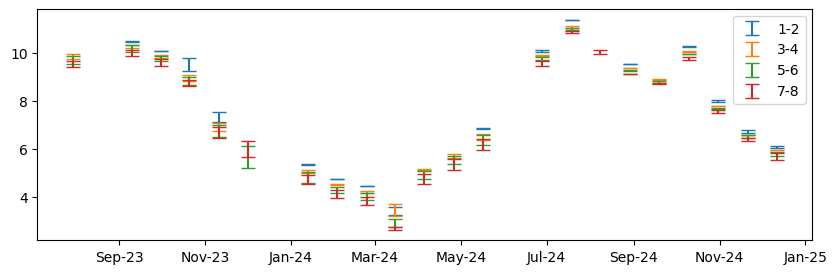

In [15]:
# plotting 'slope' by showing height difference between lower and higher latitude on each channel


# Get differences at each lat
ts_points['Date'] = pd.to_datetime(ts_points['pixcdate'])
ts_points = ts_points.sort_values('Date')

fig, ax = plt.subplots(figsize=(10,3))
i = 1
for pairs in pointpairs:


    sub1 = ts_points[ts_points.pointID == pairs[0]]
    sub2 = ts_points[ts_points.pointID == pairs[1]]

    sub2 = sub2[sub2['Date'].isin(sub1['Date'])]
    sub1 = sub1[sub1['Date'].isin(sub2['Date'])]

    Hdiff = abs(sub2.heightEGM_med - sub1.heightEGM_med)
    Hmean = (sub2.heightEGM_med + sub1.heightEGM_med)/2


    leglabel = str(pairs[0])+'-'+str(pairs[1])

    ax.errorbar(sub2.Date,Hmean,yerr=Hdiff/2,capsize=5.0,c=cmaplist[pairs[0]-1],linestyle='',label=leglabel)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    i = i+1

ax.legend()

pair:  [1, 2]
LF median diff:  0.05840587615966797
HF median diff:  0.052689552307128906
pair:  [3, 4]
LF median diff:  0.09952068328857422
HF median diff:  0.06558990478515625
pair:  [5, 6]
LF median diff:  0.33449745178222656
HF median diff:  0.1131143569946289
pair:  [7, 8]
LF median diff:  0.3826942443847656
HF median diff:  0.14912986755371094


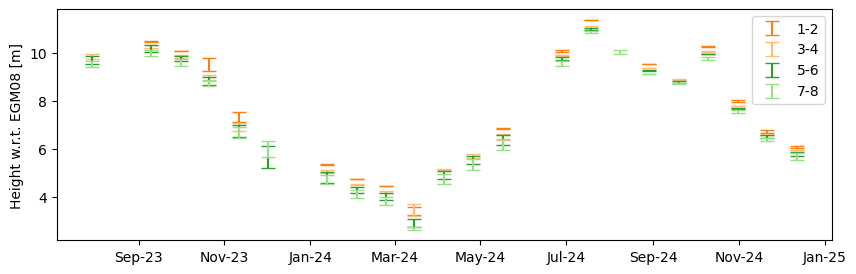

In [16]:

#pointpairs = [[3,7]]

cmap = plt.cm.tab20  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# Get differences at each lat
ts_points['Date'] = pd.to_datetime(ts_points['pixcdate'])
ts_points = ts_points.sort_values('Date')

fig, ax = plt.subplots(figsize=(10,3))
i = 2
for pairs in pointpairs:


    sub1 = ts_points[ts_points.pointID == pairs[0]]
    sub2 = ts_points[ts_points.pointID == pairs[1]]

    sub2 = sub2[sub2['Date'].isin(sub1['Date'])]
    sub1 = sub1[sub1['Date'].isin(sub2['Date'])]


    Hdiff = abs(sub2.heightEGM_med - sub1.heightEGM_med)
    Hmean = (sub2.heightEGM_med + sub1.heightEGM_med)/2
    sub1['hdiff_p1p2'] = Hdiff

    sub1['month'] = sub1['Date'].dt.month
    LFmed = np.nanmedian(sub1[sub1['month'].isin(LFmonths)].hdiff_p1p2)
    HFmed = np.nanmedian(sub1[sub1['month'].isin(HFmonths)].hdiff_p1p2)

    print('pair: ',pairs)
    print('LF median diff: ',LFmed)
    print('HF median diff: ',HFmed)

    leglabel = str(pairs[0])+'-'+str(pairs[1])

    ax.errorbar(sub2.Date,Hmean,yerr=Hdiff/2,capsize=5.0,c=cmaplist[i],linestyle='',label=leglabel)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    ax.set_ylabel('Height w.r.t. EGM08 [m]')
    #ax.set_xlabel('Date')
    i = i+1

ax.legend()
plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_TS.png')

In [17]:
sub1['month'] = sub1['Date'].dt.month
LFmed = np.median(sub1[sub1['month'].isin(LFmonths)].hdiff_p1p2)
HFmed = np.median(sub1[sub1['month'].isin(HFmonths)].hdiff_p1p2)
print('LF median diff: ',LFmed)
print('HF median diff: ',HFmed)



LF median diff:  0.3826942443847656
HF median diff:  0.14912986755371094


In [155]:
HFmonths

[6, 7, 8, 9, 10]

In [156]:
LFmonths

[1, 2, 3, 4, 5, 11, 12]

In [ ]:
# OLD plotting
# ------------------------------ PLOT selected channels for HF and LF ------------------------------

# UPDATE to include PIXC points
# PLot slopes for smaller pieces (ex. set 1.1, set1.2)
# I2 validation?


from sklearn.linear_model import LinearRegression

# LARGE CHANNELS (entire)
# channel1_dict = dict({'0224':['1','4','8','10','11','12','14','16','17','19','18','22','25','27','28','30','32'],
#                       '0924':[]})
# channel2_dict = dict({'0224':[],
#                       '0924':[]})

channelSet = 'set1'

if channelSet == 'set1':
    # SMALL main CHANNELS (parallel branches)
    channel1_dict = dict({'0224':['22','25','27','28','30','32'],
                        '0924':['23','26','28','31','35','41'],
                        '1024':['24','27','31','34','38']})
    channel2_dict = dict({'0224':['21','23','24','34','35','38'],
                        '0924':['22','24','27','37','38','43'],
                        '1024':['23','25','29','36','41','43']})


if channelSet == 'set1p1':
    # SMALL main CHANNELS (parallel branches)
    channel1_dict = dict({'0224':['22','25'],
                        '0924':['23','26'],
                        '1024':['24','27']})
    channel2_dict = dict({'0224':['21'],
                        '0924':['22','24'],
                        '1024':['23','25']})

if channelSet == 'set2':
    # SMALLER CHANNELS (divide that merges in HF)
    channel1_dict = dict({'0224':['14','16'],
                        '0924':['14','16'],
                        '1024':['16','18']})
    channel2_dict = dict({'0224':['13'],
                        '0924':['14','16'],
                        '1024':['16','18']})

if channelSet == 'set3':
    # Meander and the straight (No1)
    channel1_dict = dict({'0224':['16','17'],
                        '0924':['16','17'],
                        '1024': ['18','19']})
    channel2_dict = dict({'0224':['15'],
                        '0924':['15'],
                        '1024': ['17']})

if channelSet == 'set4':
    # Meander and the straight (No2)
    channel1_dict = dict({'0224':['18','22'],
                          '0924':['19','29'],
                          '1024':['21','24']})
    channel2_dict = dict({'0224':['20'],
                          '0924':['20','21'],
                          '1024':['20','22']})

sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson','/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240719_riverSP.geojson']

#sel_riverSP = ['/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20240203_riverSP.geojson','/Volumes/OneTouch/work/SWOTC/brahmaputra/PIXC/extracted/riverSP_out/258_112L/20241010_riverSP.geojson']


for filename in sel_riverSP:

    pixcdate = os.path.basename(filename)[0:8]

    print('Runnning braided river analysis for:',str(pixcdate))
    maskdate, water_mask_tiff = getNearestMaskDate(pixcdate, tileID, LFmonths, HFmonths)
    print('maskdate:',maskdate)


    # Load RiverSP product
    riversp_gdf = gpd.read_file(odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    print('reading in file:',odir+'riverSP_out/'+tileID+'/'+pixcdate+'_riverSP.geojson')
    riversp_gdf = riversp_gdf.to_crs('EPSG:4326')

    # load generated CLs
    cl_gen = gpd.read_file(odir+tileID+'/'+maskdate+'_generated_cl.geojson')
    cl_gen = cl_gen.to_crs('EPSG:4326') 
    sword_cl_gdf = sword_cl_gdf.to_crs('EPSG:4326')

    # Selected channels
    ch1 = channel1_dict[maskdate]
    ch2 = channel2_dict[maskdate]

    ch1 = list(map(int, ch1))
    ch2 = list(map(int, ch2))
    branch_colors = ['green','blue']

    # prep data for projection along channel cl
    riversp_gdf['joint_channel_id'] = 0
    riversp_gdf['dist_jointChannel'] = 0

    for i in range(2):
        if i == 0:
            selChannels_list = ch1
        if i == 1:
            selChannels_list = ch2

        selChannels = selChannels_list #list(map(int, selChannels_list))

        print('Extracting centerline from cl gdf... (merging and sorting)')
        # get connected CL
        idb = cl_gen['branch_id'].isin(selChannels_list)
        sel_cl = cl_gen.loc[idb]

        # Fill any gaps in selected centerline and sort reaches by branch id
        sel_cl = sel_cl.reset_index(drop=True)
        merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
        #print('merged_parts',merged_parts)
        if isinstance(merged_parts,LineString):
            merged_line = merged_parts
        else:
            merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

        merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)
        #print('Plotting joint channel '+str(i+1))
        #merged_line_gdf.plot()
        sorted_gdf = merged_line_gdf

        sorted_gdf = merged_line_gdf
        if i == 0:
            merged_line_gdf_ch1 = merged_line_gdf
        if i == 1:
            merged_line_gdf_ch2 = merged_line_gdf

        # OLD VERSION
        # merged_gdf = fill_cl_gaps(sel_cl,hemi)
        # sorted_gdf, line_sorted = sort_general_cl(merged_gdf,showPlots=False,reverse=True) # Does this need to be a single line?

        print('Projecting SWOT RiverSP to joint centerline...')
        # Select all PIXC data associated with these channels and plot projected to CL
        idx = riversp_gdf['channelID'].isin(selChannels_list)
        riversp_gdf.loc[idx, 'joint_channel_id'] = i + 1


        riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
        #swot_pixc.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(sorted_gdf,swot_pixc.loc[idx,['geometry']],hemi)
        print('Projected!')
        #print(riversp_gdf.loc[idx])
        print('Checking slope...')
        # CHECK SLOPE - IF NEGATIVE THEN REVERSE DURING 'FILL GAPS'
        channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == i + 1]
        regr = LinearRegression()
        regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])

        if np.round(regr.coef_[0][0]*1000*100,decimals=4) < 0:
            # REVERSE CENTERLINE:
            print('Slope negative! Flipping centerline and re-projecting...')
            merged_line_gdf = merged_line_gdf.reverse()
            riversp_gdf.loc[idx, 'dist_jointChannel'] = pc.projectToCenterline(merged_line_gdf,riversp_gdf.loc[idx,['geometry']],hemi)
            print('Projected!')

        
            



    ## ------------------- Project against SWORD
    riversp_gdf['dist_SWORDcl'] = pc.projectToCenterline(sword_cl_points,riversp_gdf[['geometry']],hemi)
    regr_sword = LinearRegression()
    regr_sword.fit(riversp_gdf[['dist_SWORDcl']], riversp_gdf[['heightEGM_med']])
    h_pred_sword = regr_sword.predict(riversp_gdf[['dist_SWORDcl']])

    ## ------------------- PLOT against generated centerline

    # LOAD PIXC data as well and plot with the riverSP prod...

    swot_pixc_ch1 = gpd.GeoDataFrame()
    for channel in ch1:

        swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
        if os.path.exists(swot_file):
            # load file and save to swot_pixc
            print('Reading in SWOT PIXC data....')
            swot_temp = gpd.read_file(swot_file)
            # Store
            swot_pixc_ch1 = pd.concat([swot_pixc_ch1,swot_temp])

    # project to CL
    print('Projecting SWOT PIXC data (CH1) to joint centerline...')
    swot_pixc_ch1['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch1,swot_pixc_ch1[['geometry']],hemi)


    swot_pixc_ch2 = gpd.GeoDataFrame()
    for channel in ch2:

        swot_file = odir+'riverSP_out/'+tileID+'/'+pixcdate+'_'+str(channel)+'_subswot.geojson'
        if os.path.exists(swot_file):
            # load file and save to swot_pixc
            print('Reading in SWOT PIXC data....')
            swot_temp = gpd.read_file(swot_file)
            # Store
            swot_pixc_ch2 = pd.concat([swot_pixc_ch2,swot_temp])
            
    # project to CL
    print('Projecting SWOT PIXC data (CH2) to joint centerline...')
    swot_pixc_ch2['dist_jointCL'] = pc.projectToCenterline(merged_line_gdf_ch2,swot_pixc_ch2[['geometry']],hemi)


    slopes = []
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='gray', s=0.8, label='PIXC-CH1')
    ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#D3D3D3', s=0.8, label='PIXC-CH2')

    for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

        if joint_channel == 0:
            continue

        if len(np.unique(riversp_gdf['joint_channel_id'])) == 2: # joint channels are the same...
            regr = LinearRegression()
            regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
            h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
            print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
            slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
            ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[1], s=2.0, label=str(int(joint_channel)))
            #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
            plt.figtext(0.15, 0.83, f'CH. slope = {slopes[0]} cm/km',color=branch_colors[1])
            break

        channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]
        if joint_channel == 1:
            medY = np.round(np.median(channels_gdf.heightEGM_med),0)

        regr = LinearRegression()
        regr.fit(channels_gdf[['dist_jointChannel']], channels_gdf[['heightEGM_med']])
        h_pred = regr.predict(channels_gdf[['dist_jointChannel']])
        print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
        slopes.append(np.round(regr.coef_[0][0]*1000*100,decimals=4))
        ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=2.0, label=str(int(joint_channel)))
        #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
        if joint_channel == 1:
            textH = 0.83
        else:
            textH = 0.77
        plt.figtext(0.15, textH, f'CH. {str(joint_channel)} slope = {slopes[int(joint_channel-1)]} cm/km',color=branch_colors[int(joint_channel-1)])


    if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
        ax.legend(title="Channel",loc='upper center',bbox_to_anchor=(0.9, 0.15),ncol=2, markerscale=5)
    ax.set_xlabel("Distance along generated centerline [km]")
    ax.set_ylabel("Height wrt. EGM08 [m]")
    ax.set_title('Projected along generated centerlines: '+str(pixcdate))
    # !!!!! USE THESE ONLY ONCE YOU KNOW THE LIMITS FOR SELECTED CLs
    # ax.set_xlim(0,70)
    # ax.set_ylim(medY-5,medY+5) # Always keeping window size of 10 m height for better slope comparison

    # plt.figtext(0.15, 0.83, f'CH. 1 slope = {slopes[0]} cm/km',color=branch_colors[0])
    # plt.figtext(0.15, 0.77, f'CH. 2 slope = {slopes[1]} cm/km',color=branch_colors[1])
    plt.figtext(0.15, 0.72, f'SWORD slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
    plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'.png')
    #plt.savefig(figdir+'/'+str(pixcdate)+'_projected2jointCL.png')
    plt.show()


    # Secondary plots for set1:
    if channelSet == 'set1' and pixcdate == '20240203':
        slopes = []
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(swot_pixc_ch1['dist_jointCL']/1000, swot_pixc_ch1['heightEGM'], alpha=0.4, c='gray', s=0.8, label='PIXC-CH1')
        ax.scatter(swot_pixc_ch2['dist_jointCL']/1000, swot_pixc_ch2['heightEGM'], alpha=0.4, c='#D3D3D3', s=0.8, label='PIXC-CH2')

        for joint_channel in np.unique(riversp_gdf['joint_channel_id']):

            if joint_channel == 0:
                continue

            channels_gdf = riversp_gdf[riversp_gdf['joint_channel_id'] == joint_channel]
            ax.scatter(channels_gdf['dist_jointChannel']/1000, channels_gdf['heightEGM_med'], alpha=1, c=branch_colors[int(joint_channel-1)], s=2.0, label=str(int(joint_channel)))


            # Slope 1: 
            subset1 = channels_gdf[channels_gdf['dist_jointChannel'] < 23*1000]
            regr = LinearRegression()
            regr.fit(subset1[['dist_jointChannel']], subset1[['heightEGM_med']])
            h_pred = regr.predict(subset1[['dist_jointChannel']])
            ax.plot(subset1.dist_jointChannel/1000, h_pred,markersize=1,c='red',alpha=0.5)
            slope1 = np.round(regr.coef_[0][0]*1000*100,decimals=4)
            if joint_channel == 1:
                ax.text(np.mean(subset1.dist_jointChannel/1000)-3.5,np.mean(h_pred)+0.2,f'Slope = {slope1} cm/km',color='red')
            else:
                ax.text(np.mean(subset1.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.1,f'Slope = {slope1} cm/km',color='red')


            # Slope 2
            subset2 = channels_gdf[channels_gdf['dist_jointChannel'] >= 23*1000]
            regr = LinearRegression()
            regr.fit(subset2[['dist_jointChannel']], subset2[['heightEGM_med']])
            h_pred = regr.predict(subset2[['dist_jointChannel']])
            ax.plot(subset2.dist_jointChannel/1000, h_pred,markersize=1,c='orange',alpha=0.5)
            slope2 = np.round(regr.coef_[0][0]*1000*100,decimals=4)
            if joint_channel == 1:
                ax.text(np.mean(subset2.dist_jointChannel/1000)-6,np.mean(h_pred)+0.1,f'Slope = {slope2} cm/km',color='orange')
            else:
                ax.text(np.mean(subset2.dist_jointChannel/1000)-0.1,np.mean(h_pred)-0.1,f'Slope = {slope2} cm/km',color='orange')


            #print('CH. '+str(joint_channel)+' slope = '+str(np.round(regr.coef_[0][0]*1000*100,decimals=4))+' cm/km')
            #ax.plot(channels_gdf.dist_jointChannel/1000, h_pred,'.',markersize=1,c='red')
            if joint_channel == 1:
                textH = 0.83
            else:
                textH = 0.77


        if len(np.unique(riversp_gdf['joint_channel_id'])) != 2:
            ax.legend(title="Channel",loc='upper center',bbox_to_anchor=(0.9, 0.15),ncol=2, markerscale=5)
        ax.set_xlabel("Distance along generated centerline [km]")
        ax.set_ylabel("Height wrt. EGM08 [m]")
        ax.set_title('Projected along generated centerlines: '+str(pixcdate))
        # plt.figtext(0.15, 0.83, f'CH. 1',color='green')
        # plt.figtext(0.15, 0.77, f'CH. 2',color='blue')
        plt.figtext(0.15, 0.72, f'SWORD slope = {np.round(regr_sword.coef_[0][0]*1000*100,decimals=4)} cm/km',color='black')
        plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_slopes_ch_'+channelSet+'_divided.png')
        plt.show()




    ## ------------------- PLOT selected cl


    water_mask = skel.get_watermask(water_mask_tiff)
    fig, ax = plt.subplots(figsize=(3, 6))

    # water mask
    ax.imshow(water_mask, cmap=plt.cm.gray)
    
    # entire skeleton
    coords_df = cl_gen.get_coordinates()
    cl_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
    ax.scatter(cl_pixel_coords.x,cl_pixel_coords.y,color='red',s=0.2)
    # for _, row in cl_gen.iterrows():
    #     ax.plot(*row.geometry.xy, color='red', linewidth=2)

    for i in range(2):
        if i == 0:
            selChannels_list = ch1
        if i == 1:
            selChannels_list = ch2

        selChannels = selChannels_list 

        print('Extracting centerline from cl gdf... (merging and sorting)')
        # get connected CL
        idb = cl_gen['branch_id'].isin(selChannels_list)
        sel_cl = cl_gen.loc[idb]

        # Fill any gaps in selected centerline and sort reaches by branch id
        sel_cl = sel_cl.reset_index(drop=True)
        merged_parts = skel.fill_cl_gaps(sel_cl,hemi,distance_threshold = 1000) # merge all main line parts
        if isinstance(merged_parts,LineString):
            merged_line = merged_parts
        else:
            merged_line = skel.merge_multiline_with_gaps(merged_parts)   # turns final multilinestring into single linestring and bridges any large gaps between parts

        merged_line_gdf = gpd.GeoDataFrame(geometry=[merged_line],crs=sel_cl.crs)    

        # get line in  pixel coords
        coords_df = merged_line_gdf.get_coordinates()
        merged_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)

        # for _, row in merged_line_gdf.iterrows():
        #     ax.plot(*row.geometry.xy, color=branch_colors[int(i)], linewidth=2)

        # selected channels
        ax.plot(merged_pixel_coords.x,merged_pixel_coords.y,color=branch_colors[int(i)],linewidth=2)


    # SWORD CL
    coords_df = sword_cl_gdf.get_coordinates()
    sword_pixel_coords = skel.latlon_to_pixel_coordinates(water_mask_tiff,coords_df.y,coords_df.x)
    ax.plot(sword_pixel_coords.x,sword_pixel_coords.y,color='yellow',linewidth=2)

    y, x = np.where((water_mask)) 
    min_x, max_x = x.min(), x.max()
    min_y, max_y = y.min(), y.max()
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(max_y, min_y)

    # Set plot properties
    ax.set_title("Selected centerlines "+str(pixcdate))
    # Remove x and y tick marks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig(figdir+'/'+tileID+'/riverSP_v1/'+str(pixcdate)+'_selected_channels_'+channelSet+'.png')
    plt.show()